<center>
ПРИЛОЖЕНИЕ 4
<center>
ПРИМЕР ПРЕДВАРИТЕЛЬНОЙ ПОДГОТОВКИ ДАННЫХ В PANDAS (КОНКУРСНАЯ ЗАДАЧА TINKOFF DATA SCIENCE CHALLENGE)

In [1]:
# импортируем необходимые библиотеки, классы и функции
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Считывание CSV-файла в объект DataFrame

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/credit_train.csv', encoding='cp1251', sep=';')

In [3]:
# смотрим форму датафрейма
data.shape

(170746, 15)

In [4]:
# выводим первые 5 наблюдений датафрейма
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [5]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [6]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [7]:
# смотрим количество уникальных значений
# переменной living_region
data['living_region'].nunique()

301

In [8]:
# увеличиваем максимальное количество
# отображаемых строк
pd.options.display.max_rows = 310

In [9]:
# уникальные значения переменной living_region 
# записываем в отдельный объект regions
regions = data['living_region'].unique()

In [10]:
# создаем серию, у которой в качестве значений и индексных
# меток будут выступать уникальные значения переменной
# living_region, записанные в regions
regions = pd.Series(data=regions, index=regions, name='regions')
regions

КРАСНОДАРСКИЙ КРАЙ                                                КРАСНОДАРСКИЙ КРАЙ
МОСКВА                                                                        МОСКВА
ОБЛ САРАТОВСКАЯ                                                      ОБЛ САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ОБЛ ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                              ЧЕЛЯБИНСКАЯ ОБЛАСТЬ
СТАВРОПОЛЬСКИЙ КРАЙ                                              СТАВРОПОЛЬСКИЙ КРАЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  ОБЛ НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ ОБЛ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                              КРАЙ СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                      САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                               

In [11]:
# задаем стоп-слова
stopwrds = set(['ОБЛ','ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА', 
                'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [12]:
# пишем функцию для предобработки значений серии
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x))
    wrds = x.split(' ')
    wrds_new = []
    for w in wrds:
        if not w in stopwrds:
            wrds_new.append(w)
    x = ''.join(wrds_new)
    return x

# применяем функцию к нашей серии
regions = regions.map(clean_region)

In [13]:
# смотрим результаты применения функции
regions

КРАСНОДАРСКИЙ КРАЙ                                                 КРАСНОДАРСКИЙ
МОСКВА                                                                    МОСКВА
ОБЛ САРАТОВСКАЯ                                                      САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                                  ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                               СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙАВТОНОМНЫЙОКРУГ-ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                               СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                  САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                                  БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ           

In [14]:
# вносим финальные корректировки в regions
regions['ЧУКОТСКИЙ АO'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] ='САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [15]:
# вновь смотрим серию
regions

КРАСНОДАРСКИЙ КРАЙ                                  КРАСНОДАРСКИЙ
МОСКВА                                                     МОСКВА
ОБЛ САРАТОВСКАЯ                                       САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                   ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                   ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                   НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                         МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         ХАНТЫ-МАНСИЙСКИЙ
КРАЙ СТАВРОПОЛЬСКИЙ                                СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                   САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                   БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ                                   АРХАНГЕЛЬСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АО                              ХАНТЫ-МАНСИЙСКИЙ
РЕСП БАШКОРТОСТАН                                    БАШКОРТОСТАН
ПЕРМСКИЙ К

In [16]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [17]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

In [18]:
# смотрим количество уникальных значений
# по переменной living_region
data['living_region'].nunique()

85

# Преобразование типов переменных

In [19]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null object
credit_month            170746 non-null int64
tariff_id               170746 non-null float64
score_shk               170739 non-null object
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 18.2+ MB
None


In [20]:
# преобразуем переменную tariff_id в тип object
data['tariff_id'] = data['tariff_id'].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию.

In [21]:
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [22]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null object
score_shk               170739 non-null float64
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(6), int64(2), object(6)
memory usage: 18.2+ MB
None


In [23]:
# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Переименование категорий переменных

In [24]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
d = {'M':'Male', 'F':'Female'}

# передаем словарь в метод map
data['gender'] = data['gender'].map(d)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,Female,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,Female,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,Male,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


In [25]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
f = {'Male':'M', 'Female':'F'}

# передаем в метод replace словарь, в котором ключем
# будет название переменной, а значением - словарь со
# старыми и новыми названиями категорий
data = data.replace({'gender': f})
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Обработка редких категорий

In [26]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
Name: education, dtype:

In [27]:
# выводим частоты категорий для переменной job_position,
# dropna=False выведет частоту пропусков, если они есть 
print(data['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


In [28]:
# записываем указанные категории переменной
# job_position в отдельную категорию OTHER
data.at[data['job_position'].isin(
    ['PNV', 'PNS', 'HSK', 'INV', 'ONB']), 'job_position'] = 'OTHER'

In [29]:
# выводим частоты категорий для переменной job_position
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [30]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64


In [31]:
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 1.99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = 1.99

# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
data['tariff'] = data['tariff_id'].astype('float')

# заменим точки на символы подчеркивания
data['tariff_id'] = data['tariff_id'].astype('str').str.replace('.', '_')

In [32]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1_1     69355
1_6     39117
1_32    15537
1_4     10970
1_5      7497
1_9      5538
1_43     3930
1_3      3339
1_16     3232
1_0      2245
1_44     2228
1_19     2102
1_2      1306
1_7      1007
1_17      717
1_21      579
1_94      414
1_22      376
1_23      370
1_91      317
1_24      303
1_41      132
1_99       79
1_25       56
Name: tariff_id, dtype: int64


In [33]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

ЕВРЕЙСКАЯ      203
nan            192
НЕНЕЦКИЙ       172
МАГАДАНСКАЯ    159
ДАГЕСТАН        69
АЛТАЙ           54
ЧУКОТСКИЙ       32
ЧЕЧЕНСКАЯ       31
ИНГУШЕТИЯ       19
ЧИТИНСКАЯ       17
Name: living_region, dtype: int64


In [34]:
# создаем серию, у которой значениями будут частоты 
# категорий переменной living_region
region_series = data['living_region'].value_counts()

In [35]:
# создаем булеву маску, если частота категории меньше 0.029,
# будет возвращено значение TRUE, в противном случае
# будет возвращено значение FALSE
mask = (region_series/region_series.sum() * 100).lt(0.029)

# выводим последние 10 категорий
mask.tail(10)

ЕВРЕЙСКАЯ      False
nan            False
НЕНЕЦКИЙ       False
МАГАДАНСКАЯ    False
ДАГЕСТАН       False
АЛТАЙ          False
ЧУКОТСКИЙ       True
ЧЕЧЕНСКАЯ       True
ИНГУШЕТИЯ       True
ЧИТИНСКАЯ       True
Name: living_region, dtype: bool

In [36]:
# с помощью функции np.where мы все категории, по которым возвращено 
# значение TRUE, заменим на категорию OTHER, в противном случае 
# оставим категории неизменными
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

In [37]:
# выводим частоты для последних 10 категорий 
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

КАМЧАТСКИЙ               412
СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ    379
КАЛМЫКИЯ                 305
ЕВРЕЙСКАЯ                203
nan                      192
НЕНЕЦКИЙ                 172
МАГАДАНСКАЯ              159
OTHER                     99
ДАГЕСТАН                  69
АЛТАЙ                     54
Name: living_region, dtype: int64


# Разбиение набора данных на обучающую и контрольную

In [38]:
# создаем обучающий массив признаков, обучающий массив меток,
# тестовый массив признаков, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop('open_account_flg', axis=1), 
                                                data['open_account_flg'], 
                                                test_size=.3, 
                                                stratify=data['open_account_flg'], 
                                                random_state=100)

In [39]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

gender                     0
age                        2
marital_status             2
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  5
education                  2
living_region              0
monthly_income             2
credit_count            6483
overdue_credit_count    6483
tariff                     0
dtype: int64

In [40]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

gender                     0
age                        1
marital_status             1
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  2
education                  3
living_region              0
monthly_income             3
credit_count            2747
overdue_credit_count    2747
tariff                     0
dtype: int64

In [41]:
# заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)

In [42]:
# заполняем пропуски в переменных credit_sum, score_shk 
# и monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [43]:
# заполняем пропуски в переменных credit_count,
# overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    train[i].fillna(-1, inplace=True)
    test[i].fillna(-1, inplace=True)

In [44]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65867
UNM    36522
DIV    11772
CIV     2909
WID     2450
NaN        2
Name: marital_status, dtype: int64
MAR    28087
UNM    15627
DIV     5197
CIV     1287
WID     1025
NaN        1
Name: marital_status, dtype: int64


In [45]:
# вычисляем моду для переменной
# education
train['marital_status'].mode()

0    MAR
dtype: object

In [46]:
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna('MAR')
test['marital_status'] = test['marital_status'].fillna('MAR')

In [47]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65869
UNM    36522
DIV    11772
CIV     2909
WID     2450
Name: marital_status, dtype: int64
MAR    28088
UNM    15627
DIV     5197
CIV     1287
WID     1025
Name: marital_status, dtype: int64


In [48]:
# выводим частоты категорий
# для переменной education
print(train['education'].value_counts(dropna=False))
print(test['education'].value_counts(dropna=False))

SCH    61332
GRD    50753
UGR     6975
PGR      387
ACD       73
NaN        2
Name: education, dtype: int64
SCH    26205
GRD    21838
UGR     2966
PGR      178
ACD       34
NaN        3
Name: education, dtype: int64


In [49]:
# выполняем импутацию пропусков модой
train['education'].fillna(train['education'].value_counts().index[0], inplace=True)
test['education'].fillna(train['education'].value_counts().index[0], inplace=True)

# Конструирование новых признаков

In [50]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

In [51]:
# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

## Создание переменной, у которой значения основаны на значениях исходной переменной

In [52]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(train['job_position'].unique())

['SPC' 'UMN' 'PNA' 'WOI' 'WRK' 'BIS' 'ATP' 'DIR' 'NOR' 'OTHER' 'INP' 'WRP'
 'BIU' 'PNI']


In [53]:
# затем создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}

# cоздаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
train['avrzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,avrzarplata
34186,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1.10,1473.250000,0.058930,63000
46420,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1.10,1735.333000,0.057844,63000
144290,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1.60,1538.900000,0.043969,51000
139611,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1.32,1830.100000,0.061003,63000
109229,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,1.10,636.611111,0.057874,71000


In [54]:
# удалим переменную avrzarplata
train.drop('avrzarplata', axis=1, inplace=True)

## Создание бинарной переменной на основе значений количественных переменных

In [55]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
train['retired'] = np.where(train['age']>=60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,retired
34186,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1.10,1473.250000,0.058930,No
46420,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1.10,1735.333000,0.057844,No
144290,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1.60,1538.900000,0.043969,No
139611,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1.32,1830.100000,0.061003,No
109229,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,1.10,636.611111,0.057874,Yes


In [56]:
# создаем новую переменную age_inc, которая принимает значение "Yes",
# если речь идет о клиентах старше 35 лет И с суммой кредита свыше 10000, 
# и значение "No" в противном случае
train['age_inc'] = np.where((train['age'] > 35) & (train['credit_sum'] > 10000), 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,retired,age_inc
34186,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1.10,1473.250000,0.058930,No,No
46420,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1.10,1735.333000,0.057844,No,Yes
144290,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1.60,1538.900000,0.043969,No,No
139611,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1.32,1830.100000,0.061003,No,Yes
109229,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,1.10,636.611111,0.057874,Yes,Yes


In [57]:
# удалим переменные retired и age_inc
train.drop(['retired', 'age_inc'], axis=1, inplace=True)

## Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной

In [58]:
# пишем функцию, создающую переменную, у которой каждое 
# значение будет средним значением количественной
# переменной (real_feature), взятым по уровню 
# категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# cоздаем переменную, у которой каждое значение - 
# среднее значение monthly_income в 
# категории переменной living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,region_mean_income
34186,F,31.0,MAR,SPC,17679.00,12,1_1,0.417126,GRD,КЕМЕРОВСКАЯ,25000.0,1.0,0.0,1.10,1473.250000,0.058930,31722.560294
46420,M,37.0,MAR,SPC,17353.33,10,1_1,0.488022,SCH,ВОЛГОГРАДСКАЯ,30000.0,0.0,0.0,1.10,1735.333000,0.057844,31708.270771
144290,M,27.0,MAR,UMN,15389.00,10,1_6,0.707397,GRD,ТАТАРСТАН,35000.0,4.0,0.0,1.60,1538.900000,0.043969,36600.517612
139611,F,38.0,UNM,SPC,18301.00,10,1_32,0.343173,GRD,ТВЕРСКАЯ,30000.0,0.0,0.0,1.32,1830.100000,0.061003,34083.284007
109229,F,64.0,DIV,PNA,11459.00,18,1_1,0.554380,SCH,ЧЕЛЯБИНСКАЯ,11000.0,0.0,0.0,1.10,636.611111,0.057874,33618.413074


In [59]:
# удалим переменную region_mean_income
train.drop('region_mean_income', axis=1, inplace=True)

## Возведение в квадрат

In [60]:
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2


## Дамми-кодирование (One Hot Encoding)

In [61]:
# выполняем дамми-кодирование 
# по методу неполного ранга
dummies_unfull_rank_marital_status = pd.get_dummies(train['marital_status'])
# выводим первые 5 наблюдений
dummies_unfull_rank_marital_status.head()

,CIV,DIV,MAR,UNM,WID
34186,0,0,1,0,0
46420,0,0,1,0,0
144290,0,0,1,0,0
139611,0,0,0,1,0
109229,0,1,0,0,0


In [62]:
# выполняем дамми-кодирование 
# по методу полного ранга
dummies_full_rank_marital_status = pd.get_dummies(train['marital_status'], 
                                                  drop_first=True)
# выводим первые 5 наблюдений
dummies_full_rank_marital_status.head()

,DIV,MAR,UNM,WID
34186,0,1,0,0
46420,0,1,0,0
144290,0,1,0,0
139611,0,0,1,0
109229,1,0,0,0


## Кодирование контрастами (Effect Coding)

In [63]:
# выполняем кодирование контрастами
effects_marital_status = pd.get_dummies(train['marital_status'])
effects_marital_status = effects_marital_status.iloc[:,:-1]
effects_marital_status.loc[np.all(effects_marital_status == 0, axis=1)] = -1.

# выводим первые 10 наблюдений
effects_marital_status.head(10)

,CIV,DIV,MAR,UNM
34186,0.000,0.000,1.000,0.000
46420,0.000,0.000,1.000,0.000
144290,0.000,0.000,1.000,0.000
139611,0.000,0.000,0.000,1.000
109229,0.000,1.000,0.000,0.000
112367,0.000,0.000,0.000,1.000
55461,0.000,0.000,1.000,0.000
1656,0.000,1.000,0.000,0.000
146569,0.000,1.000,0.000,0.000
159611,0.000,0.000,0.000,1.000


## Присвоение категориям в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding)

In [64]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder
# создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()
# выполняем кодировку
train['job_position2'] = label_encoder.fit_transform(train['job_position'])
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,job_position2
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,9
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,9
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,10
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,1830.100,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,9
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,636.611,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,7


In [65]:
# удалим переменную job_position2
train.drop('job_position2', axis=1, inplace=True)

## Создание переменной, у которой каждое значение – частота наблюдений в категории переменных (Frequency Encoding)

In [66]:
# cоздаем переменную region_abs_freq, у которой каждое значение - абсолютная 
# частота наблюдений в категории переменной living_region
abs_freq = train['living_region'].value_counts()
train['region_abs_freq'] = train['living_region'].map(abs_freq)
test['region_abs_freq'] = test['living_region'].map(abs_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,region_abs_freq
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,2040
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,1673
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,5394
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,1830.100,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,1088
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,636.611,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,3595


In [67]:
# создаем переменную region_rel_freq, у которой каждое значение - относительная 
# частота наблюдений в категории переменной living_region
rel_freq = train['living_region'].value_counts() / len(train['living_region'])
train['region_rel_freq'] = train['living_region'].map(rel_freq)
test['region_rel_freq'] = test['living_region'].map(rel_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,region_abs_freq,region_rel_freq
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,2040,0.017
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,1673,0.014
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,5394,0.045
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,1088,0.009
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,3595,0.030


In [68]:
# удалим переменные region_abs_freq и region_rel_freq
train.drop(['region_abs_freq', 'region_rel_freq'], axis=1, inplace=True)
test.drop(['region_abs_freq', 'region_rel_freq'], axis=1, inplace=True)

## Кодирование вероятностями зависимой переменной  (Likelihood Encoding)

In [69]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [70]:
# создаем список из двух признаков и зависимой переменной
cat_cols = ['living_region', 'job_position']
# создаем обучающий массив признаков
X_train_for_target_enc = train[cat_cols]
# создаем контрольный массив признаков
X_test_for_target_enc = test[cat_cols]

In [71]:
# пишем функцию, выполняющую кодирование средними
# значениями зависимой переменной
def mean_target_enc(X_train, y_train, X_valid, skf):
    # отключаем предупреждения Anaconda
    import warnings
    warnings.filterwarnings('ignore')
    
    # вычисляем глобальное среднее - среднее значение 
    # зависимой переменной в обучающем наборе
    glob_mean = y_train.mean()
    
    # конкатенируем обучающий массив с признаками (задается первым аргументом) 
    # и обучающий массив с метками зависимой переменной (задается вторым
    # аргументом) по оси столбцов 
    X_train = pd.concat([X_train, pd.Series(y_train, name='open_account_flg')], axis=1)
    # создаем копию массива признаков, получившегося в результате конкатенации
    new_X_train = X_train.copy()
    
    # создаем список с именами категориальных признаков,
    # который мы будем использовать ниже в циклах for
    cat_features = X_train.columns[X_train.dtypes == 'object'].tolist()
    
    # для каждого категориального признака создаем столбец, каждое
    # значение которого - глобальное среднее
    for col in cat_features:
        new_X_train[col + '_mean_target'] = [glob_mean for _ in range(new_X_train.shape[0])]

    # вычисляем среднее значение зависимой переменной в категории признака
    # по каждому блоку перекрестной проверки, используя данные вне этого блока
    # например, мы используем 5-блочную перекрестную проверку и нам нужно 
    # вычислить среднее значение зависимой переменной для категории A в блоке 0,
    # для вычисления этого среднего значения используются лишь наблюдения в категории А 
    # в обучающих блоках 1, 2, 3, 4, если вместо категорий у нас 
    # значения NaN, заменяем глобальным средним, в итоге
    # получаем новый обучающий набор
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]

        for col in cat_features:            
            means = X_valid_cv[col].map(X_train_cv.groupby(col)['open_account_flg'].mean())            
            X_valid_cv[col + '_mean_target'] = means.fillna(glob_mean)
            
        new_X_train.iloc[valid_idx] = X_valid_cv
    
    # удаляем из нового обучающего набора категориальные признаки и зависимую переменную
    new_X_train.drop(cat_features + ['open_account_flg'], axis=1, inplace=True)
    
    # создаем копию контрольного массива признаков
    new_X_valid = X_valid.copy()
    
    # каждую категорию категориального признака в контрольном наборе
    # заменяем средним значением зависимой переменной в этой же категории
    # признака, вычисленным на обучающем наборе, значения NaN 
    # заменяем глобальным средним
    for col in cat_features:        
        means = new_X_valid[col].map(X_train.groupby(col)['open_account_flg'].mean())        
        new_X_valid[col + '_mean_target'] = means.fillna(glob_mean)
    
    # удаляем из контрольного набора категориальные признаки
    new_X_valid.drop(X_train.columns[X_train.dtypes == 'object'], axis=1, inplace=True)
    
    # возвращаем новые датафреймы
    return new_X_train, new_X_valid

In [72]:
# выполняем кодирование средними значениями
# зависимой переменной для переменных
# living_region и job_position
# в обучающем и контрольном наборах
train_mean_target, test_mean_target = mean_target_enc(X_train_for_target_enc, y_train, X_test_for_target_enc, skf)

In [73]:
# взглянем на результаты кодировки в обучающем массиве признаков
train_mean_target.head()

,living_region_mean_target,job_position_mean_target
34186,0.208,0.166
46420,0.181,0.165
144290,0.148,0.191
139611,0.211,0.166
109229,0.184,0.360


In [74]:
# импортируем кодировщики из пакета category_encoders, предварительно 
# установив его в Anaconda Prompt с помощью
# команды conda install -c conda-forge category_encoders
from category_encoders import *

In [75]:
# создаем экземпляр класса TargetEncoder (модель)
# для обучающего массива признаков
target_enc = TargetEncoder(cols=['living_region', 'job_position'], 
                           smoothing=2, 
                           min_samples_leaf=4)

In [76]:
# обучаем модель, т.е. создаем таблицу, в соответствии с которой 
# категориям предиктора в обучающей выборке будут сопоставлены 
# сглаженные средние значения зависимой переменной
target_enc.fit(X_train_for_target_enc, y_train)

# применяем модель к обучающему массиву признаков, категории предиктора 
# в обучающей выборке заменяются на сглаженные средние значения зависимой 
# переменной
target_encoded_train = target_enc.transform(X_train_for_target_enc)

# создаем экземпляр класса TargetEncoder (модель)
# для контрольной выборки
target_enc_test = TargetEncoder(cols=['living_region', 'job_position'], 
                                smoothing=False)

# обучаем модель, т.е. создаем таблицу, в соответствии с которой 
# категориям предиктора в контрольной выборке будут сопоставлены 
# обычные средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
target_enc_test.fit(X_train_for_target_enc, y_train)

# применяем модель к контрольной выборке,
# категории предиктора в контрольной выборке заменяются на обычные 
# средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
target_encoded_test = target_enc_test.transform(X_test_for_target_enc)

In [77]:
# взглянем на результаты кодировки в обучающем массиве признаков
target_encoded_train.head()

,living_region,job_position
34186,0.208,0.166
46420,0.180,0.166
144290,0.147,0.191
139611,0.210,0.166
109229,0.188,0.364


## Создание переменных-взаимодействий

In [78]:
# пишем функцию, которая создает взаимодействие
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
make_conj(train, 'education', 'marital_status')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,education + marital_status
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,GRD + MAR
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,SCH + MAR
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,GRD + MAR
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,1830.100,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,GRD + UNM
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,636.611,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,SCH + DIV


In [79]:
# удалим переменную education + marital_status
train.drop('education + marital_status', axis=1, inplace=True)

## Категоризация (биннинг) количественной переменной

### Категоризация на основе интервалов, заданных вручную

In [80]:
# задаем точки, в которых будут находится границы категорий 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels=group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,incomecat
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,Low
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,Low
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,Low
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,1830.100,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,Low
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,636.611,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,Low


In [81]:
# удалим переменную incomecat
train.drop('incomecat', axis=1, inplace=True)

### Категоризация на основе квантилей

In [82]:
# осуществляем биннинг переменной monthly_income 
# на основе децилей и записываем результаты 
# в новую переменную income_decile
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,income_decile
34186,F,31.000,MAR,SPC,17679.000,12,1_1,0.417,GRD,КЕМЕРОВСКАЯ,...,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,"(24000.0, 26137.2]"
46420,M,37.000,MAR,SPC,17353.330,10,1_1,0.488,SCH,ВОЛГОГРАДСКАЯ,...,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,"(26137.2, 30000.0]"
144290,M,27.000,MAR,UMN,15389.000,10,1_6,0.707,GRD,ТАТАРСТАН,...,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,"(30000.0, 35000.0]"
139611,F,38.000,UNM,SPC,18301.000,10,1_32,0.343,GRD,ТВЕРСКАЯ,...,1830.100,0.061,1.742,1444.000,334926601.000,0.118,900000000.000,100,0.000,"(26137.2, 30000.0]"
109229,F,64.000,DIV,PNA,11459.000,18,1_1,0.554,SCH,ЧЕЛЯБИНСКАЯ,...,636.611,0.058,1.210,4096.000,131308681.000,0.307,121000000.000,324,0.000,"(4999.999, 20000.0]"


In [83]:
# удалим переменную income_decile
train.drop('income_decile', axis=1, inplace=True)

In [84]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 34186 to 4971
Data columns (total 23 columns):
gender                  119522 non-null object
age                     119522 non-null float64
marital_status          119522 non-null object
job_position            119522 non-null object
credit_sum              119522 non-null float64
credit_month            119522 non-null int64
tariff_id               119522 non-null object
score_shk               119522 non-null float64
education               119522 non-null object
living_region           119522 non-null object
monthly_income          119522 non-null float64
credit_count            119522 non-null float64
overdue_credit_count    119522 non-null float64
tariff                  119522 non-null float64
paym                    119522 non-null float64
pti                     119522 non-null float64
tariff_sq               119522 non-null float64
age_sq                  119522 non-null float64
credit_sum_sq           119522 

In [85]:
# выполняем дамми-кодирование
X_train = pd.get_dummies(train)
X_test = pd.get_dummies(test)

In [86]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 150)
X_train.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,living_region_БАШКОРТОСТАН,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ
34186,31.000,17679.000,12,0.417,25000.000,1.000,0.000,1.100,1473.250,0.059,1.210,961.000,312547041.000,0.174,625000000.000,144,1.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46420,37.000,17353.330,10,0.488,30000.000,0.000,0.000,1.100,1735.333,0.058,1.210,1369.000,301138062.089,0.238,900000000.000,100,0.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144290,27.000,15389.000,10,0.707,35000.000,4.000,0.000,1.600,1538.900,0.044,2.560,729.000,236821321.000,0.500,1225000000.000,100,16.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

# Построение случайного леса и логистической регрессии

In [87]:
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, 
                              random_state=152, n_jobs=-1, oob_score=True)
# строим модель
forest.fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели случайного леса
print("AUC на обучающей выборке по обычному методу: {:.3f}".format(
    roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
print("AUC на обучающей выборке по методу OOB: {:.3f}".format(
    roc_auc_score(y_train, forest.oob_decision_function_[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке по обычному методу: 0.896
AUC на обучающей выборке по методу OOB: 0.761
AUC на контрольной выборке: 0.765


In [88]:
# записываем список индексов категориальных предикторов
cat_features_idx = np.where(train.dtypes == 'object')[0].tolist()
# выводим этот список
cat_features_idx

[0, 2, 3, 6, 8, 9]

In [89]:
# задаем значения параметров и гиперпараметров
params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'custom_metric': 'F1',
    'random_seed': 42,
    'iterations': 1000,
    'learning_rate': 0.06,
    'subsample': 1,
    'bootstrap_type': 'Bernoulli',
    'simple_ctr': 'Borders:CtrBorderCount=30',
    'feature_border_type': 'Uniform',
    'logging_level': 'Silent',
    'use_best_model': False
}

In [90]:
# создаем обучающий и контрольный пулы
train_pool = Pool(train, y_train, cat_features=cat_features_idx)
validate_pool = Pool(test, y_test, cat_features=cat_features_idx)

In [91]:
# создаем экземпляр класса CatBoostClassifier
model = CatBoostClassifier(**params)
# обучаем модель на обучающем пуле, с помощью
# контрольного пула оптимизируем AUC и
# печатаем графики обучения и валидации
model.fit(train_pool, eval_set=validate_pool, plot=True)

Change of simpleCtr will not affect combinations ctrs.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Change of simpleCtr will not affect combinations ctrs.


In [92]:
# печатаем значение AUC для контрольной выборки
print('AUC модели на контрольной выборке: {:.3}'.format(
    roc_auc_score(y_test, model.predict_proba(test)[:, 1])))

AUC модели на контрольной выборке: 0.771


In [93]:
# строим модель, передав в метод .fit() исходные 
# массивы признаков и массивы меток
model = CatBoostClassifier(   
    loss_function='Logloss',
    eval_metric='AUC',
    custom_metric='F1',
    iterations=1000,
    learning_rate=0.06,
    subsample=1,
    bootstrap_type='Bernoulli',
    simple_ctr='Borders:CtrBorderCount=30',
    feature_border_type='Uniform', 
    random_seed=42,
    logging_level='Silent',
    use_best_model=False
)

model.fit(
    train, y_train,
    cat_features=cat_features_idx,
    eval_set=(test, y_test),
    plot=True
)

Change of simpleCtr will not affect combinations ctrs.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Change of simpleCtr will not affect combinations ctrs.


In [94]:
# создаем экземпляр класса LogisticRegression
# и подгоняем модель
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели логистической регрессии
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.546
AUC на контрольной выборке: 0.548


# Отдельная предварительная подготовка данных для логистической регрессии

In [95]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/credit_train.csv', encoding='cp1251', sep=';')

In [96]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

In [97]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [98]:
# преобразуем переменную tariff_id в тип object
data['tariff_id'] = data['tariff_id'].astype('object')
        
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [99]:
# укрупняем редкие категории job_position, tariff_id и living_region
data.loc[data['job_position'].value_counts()[data['job_position']].values < 50, 
         'job_position'] = 'OTHER'

data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 30, 
         'tariff_id'] = 1.99

data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

In [100]:
# создаем переменную - статус клиента в зависимости
# от внутренней скоринговой оценки
data['status'] = np.where(data['score_shk'] <= 0.5, 0, 1)

In [101]:
data['dir_status'] = np.where(data['job_position'].isin(['DIR', 'BIS']), 1, 0)

In [102]:
# заменим точки на символы подчеркивания
data['tariff_id'] = data['tariff_id'].astype('str').str.replace('.', '_')

In [103]:
# создаем индикатор пропусков для переменной overdue_credit_count,
# если переменная содержит пропуск, индикатор принимает значение 1,
# если не содержит, индикатор принимает значение 0
data['ind'] = np.where(
    data['overdue_credit_count'].isnull(), 1, 0)

In [104]:
# создаем обучающий массив признаков, обучающий массив меток,
# тестовый массив признаков, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop('open_account_flg', axis=1), 
                                                data['open_account_flg'], 
                                                test_size=.3, 
                                                stratify=data['open_account_flg'], 
                                                random_state=100)

In [105]:
# импутируем пропуски в указанных переменных медианами
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
          'credit_count', 'overdue_credit_count']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

In [106]:
# пропуски в переменных marital_status и education
# заменяем на самую часто встречающуюся категорию
for i in ['marital_status', 'education']:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

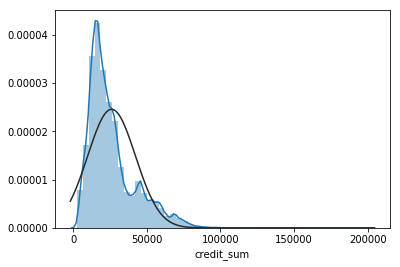

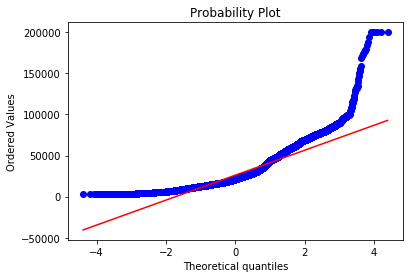

In [107]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной credit_sum
sns.distplot(train['credit_sum'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['credit_sum'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: обратное преобразование, корень четвертой степени, кубический корень, квадратный корень (перечислены в порядке уменьшения строгости, т.е. обратное преобразование применяется для очень сильной правосторонней асимметрии, а квадратный корень - для слабовыраженной правосторонней асимметрии). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа. 
Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: логарифм (константа – x), кубический корень (константа – x) и квадратный корень (константа – x). Константа k подбирается так, чтобы при вычитании из нее исходного значения переменной итоговое наименьшее значение было равно 1. Обычно в качестве константы берут максимальное значение переменной + 1. Также применяется возведение в квадрат или куб. Возведение в куб применяется для работы с распределением, сильно скошенным влево, возведение в квадрат – для работы с распределением, умеренно скошенным влево.

In [108]:
# вычисляем коэффициент асимметрии
train['credit_sum'].skew()

1.4415307336215946

In [109]:
# вычисляем коэффициент эксцесса
train['credit_sum'].kurtosis()

2.9628125902192077

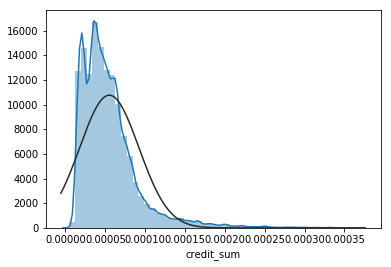

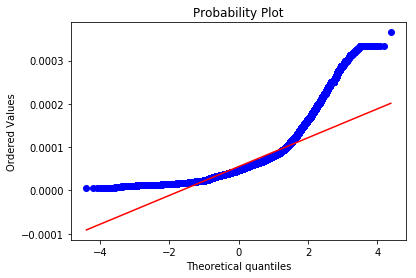

In [110]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив обратное 
# преобразование для переменной credit_sum,
# используем константу a, чтобы не брать
# отрицательные значения и ноль
a = 0.001
sns.distplot(np.reciprocal(train['credit_sum'] + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.reciprocal(train['credit_sum'] + a), plot=plt)

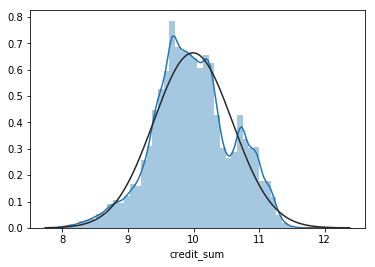

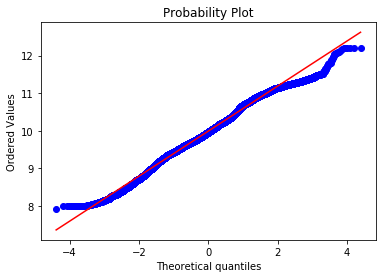

In [111]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной credit_sum,
# используем константу a, чтобы не брать
# логарифм отрицательных чисел и нуля
sns.distplot(np.log(train['credit_sum'] + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['credit_sum'] + a), plot=plt)

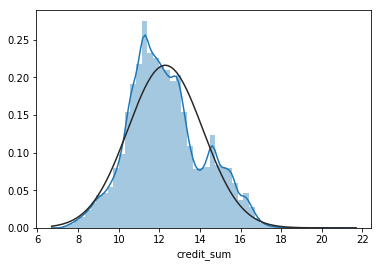

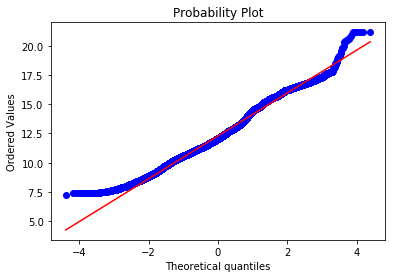

In [112]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# корнем четвертой степени для переменной credit_sum, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['credit_sum']) * 
             (train['credit_sum'].abs() ** (1/4)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['credit_sum']) * 
                     (train['credit_sum'].abs() ** (1/4)), plot=plt)

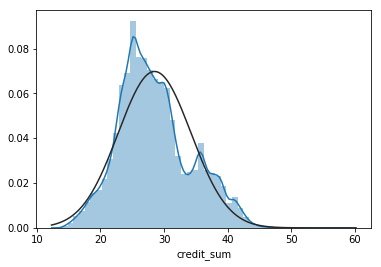

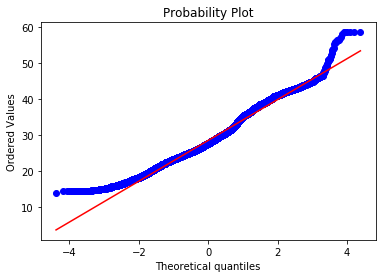

In [113]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной credit_sum,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['credit_sum']) * 
             (train['credit_sum'].abs() ** (1/3)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['credit_sum']) * 
                     (train['credit_sum'].abs() ** (1/3)), plot=plt)

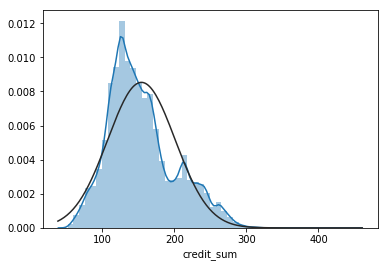

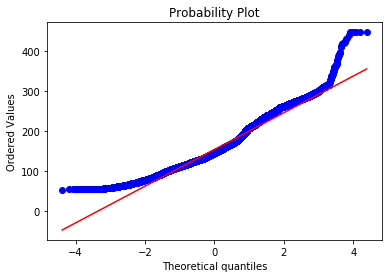

In [114]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной credit_sum,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа

sns.distplot(np.sign(train['credit_sum']) *  
             (train['credit_sum'].abs() ** (1/2)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['credit_sum']) * 
                     (train['credit_sum'].abs() ** (1/2)), plot=plt)

In [115]:
# импортируем функцию boxcox
from scipy.stats import boxcox
# выполняем преобразование Бокса-Кокса
transformed, lam = boxcox(train['credit_sum'])
print('Lambda: %f' % lam)

Lambda: 0.039902


Преобразование Бокса-Кокса представляет собой целое семейство преобразований. При lambda = -1 выполняется обратное преобразование. При lambda = -0,5 выполняется преобразование обратного квадратного корня. При lambda = 0 выполняется логарифмическое преобразование. При lambda = 0,5 выполняется преобразование квадратного корня. При lambda = 1 преобразование не выполняется.

В данном случае наше значение 0,04, будет выполнено логарифмическое преобразование. Давайте построим гистограмму и график Q-Q для переменной, к которой было применено преобразование Бокса-Кокса.

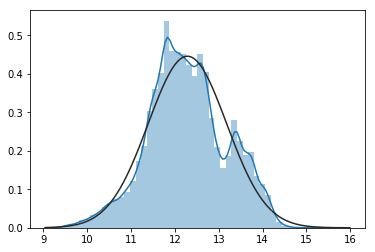

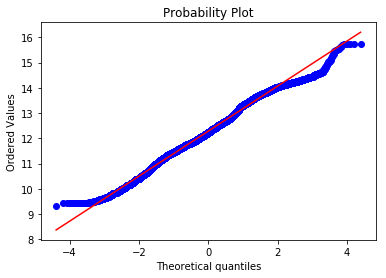

In [116]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income,
# преобразованной с помощью Бокса-Кокса
sns.distplot(transformed, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed, plot=plt)

In [117]:
# пишем функцию, вычисляющую скос по каждой переменной
def diagnostics_skewness(df, target):
    # создаем список переменных
    col_list = df.select_dtypes(include=['number']).columns
    skew_initial_list = []
    skew_pos_reciprocal_list = []
    skew_neg_reciprocal_list = []
    skew_log_list = []
    skew_corr_log_001_list = []
    skew_corr_log_01_list = []
    skew_corr_log_1_list = []
    skew_corr_log_5_list = []
    skew_cbrt_list = []
    skew_sqrt_list = []
    
    
    # запускаем цикл, который вычисляет скос по каждой 
    # преобразованной переменной
    for i in col_list:
        a = 0.001
        skew_initial = df[i].skew()
        skew_pos_reciprocal = (1 / (df[i].clip(0) + a)).skew()
        skew_neg_reciprocal = (-1 / (df[i].clip(0) + a)).skew()
        skew_log = np.log(df[i].clip(0) + a).skew()
        skew_corr_log_001 = np.log((df[i].clip(0) / df[i].mean()) + 0.001).skew()
        skew_corr_log_01 = np.log((df[i].clip(0) / df[i].mean()) + 0.01).skew()
        skew_corr_log_1 = np.log((df[i].clip(0) / df[i].mean()) + 0.1).skew()
        skew_corr_log_5 = np.log((df[i].clip(0) / df[i].mean()) + 0.5).skew()
        skew_cbrt = np.cbrt(df[i]).skew()
        skew_sqrt = np.sqrt(df[i]).skew()
        skew_initial_list.append(skew_initial)
        skew_pos_reciprocal_list.append(skew_pos_reciprocal)
        skew_neg_reciprocal_list.append(skew_neg_reciprocal)
        skew_log_list.append(skew_log)
        skew_corr_log_001_list.append(skew_corr_log_001)
        skew_corr_log_01_list.append(skew_corr_log_01)
        skew_corr_log_1_list.append(skew_corr_log_1)
        skew_corr_log_5_list.append(skew_corr_log_5)
        skew_cbrt_list.append(skew_cbrt)
        skew_sqrt_list.append(skew_sqrt)   

    result = pd.DataFrame({'Переменная': col_list,
                           'Skew_init': skew_initial_list,
                           'Skew_pos_recip': skew_pos_reciprocal_list,
                           'Skew_neg_recip': skew_neg_reciprocal_list,
                           'Skew_log': skew_log_list,
                           'Skew_adj_log (k=0.001)': skew_corr_log_001_list,
                           'Skew_adj_log (k=0.01)': skew_corr_log_01_list,
                           'Skew_adj_log (k=0.1)': skew_corr_log_1_list,
                           'Skew_adj_log (k=0.5)': skew_corr_log_5_list,
                           'Skew_cbrt': skew_cbrt_list,
                           'Skew_sqrt': skew_sqrt_list})
    result = np.round(result.sort_values(by='Skew_init', ascending=False), 3)
    cm = sns.light_palette('magenta', as_cmap=True)
    return(result.style.background_gradient(cmap=cm))

In [118]:
diagnostics_skewness(train, y_train)

,Переменная,Skew_init,Skew_pos_recip,Skew_neg_recip,Skew_log,Skew_adj_log (k=0.001),Skew_adj_log (k=0.01),Skew_adj_log (k=0.1),Skew_adj_log (k=0.5),Skew_cbrt,Skew_sqrt
4,monthly_income,5.309,1.552,-1.552,0.266,0.268,0.287,0.446,0.886,1.008,1.531
6,overdue_credit_count,4.601,-4.475,4.475,4.475,4.475,4.475,4.476,4.477,4.48,4.491
9,ind,3.936,-3.936,3.936,3.936,3.936,3.936,3.936,3.936,3.936,3.936
8,dir_status,3.92,-3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92
2,credit_month,2.67,3.442,-3.442,-0.226,-0.222,-0.188,0.102,0.837,0.817,1.312
1,credit_sum,1.442,2.323,-2.323,-0.068,-0.066,-0.043,0.134,0.501,0.458,0.701
5,credit_count,1.418,1.95,-1.95,-1.789,-1.755,-1.548,-0.95,-0.173,-1.052,-0.33
0,age,0.724,0.335,-0.335,0.189,0.189,0.194,0.237,0.364,0.365,0.454
7,status,0.475,-0.475,0.475,0.475,0.475,0.475,0.475,0.475,0.475,0.475
3,score_shk,0.237,316.242,-316.242,-0.632,-0.668,-0.573,-0.451,-0.226,-0.264,-0.124


In [119]:
# пишем функцию, вычисляющую важности переменных по AUC
def importance_auc(train, target, test):
    train_copy = train.loc[:, train.apply(pd.Series.nunique) > 10].copy()
    test_copy = test.loc[:, test.apply(pd.Series.nunique) > 10].copy()
    # создаем список переменных
    col_list = train_copy.select_dtypes(include=['number']).columns
    # создаем список, в который будем записывать auc
    auc_list = []
    for i in col_list:
        train_copy[i].fillna(train_copy[i].median(), inplace=True)
        power = PowerTransformer(
            method='yeo-johnson', standardize=True).fit(train_copy[i].values.reshape(-1,1))
        train_copy[i] = power.transform(train_copy[i].values.reshape(-1,1))
        test_copy[i].fillna(test_copy[i].median(), inplace=True)
        test_copy[i] = power.transform(test_copy[i].values.reshape(-1,1))
        logreg = LogisticRegression(solver='liblinear').fit(train_copy[i].values.reshape(-1,1), y_train)
        auc = roc_auc_score(y_test, logreg.predict_proba(test_copy[i].values.reshape(-1,1))[:, 1])
        auc_list.append(auc)
    
    result = pd.DataFrame({'Переменная': col_list,
                           'AUC': auc_list})
    result = np.round(result.sort_values(by='AUC', ascending=False), 3)
    cm = sns.light_palette('yellow', as_cmap=True)
    return(result.style.background_gradient(cmap=cm))

In [120]:
importance_auc(train, y_train, test)

,Переменная,AUC
1,credit_sum,0.554
3,score_shk,0.535
0,age,0.534
2,credit_month,0.529
5,credit_count,0.523
4,monthly_income,0.5


Для количественных независимых переменных биннинг – это разбивка диапазона значений переменной на интервалы (бины). Например, есть переменная `Возраст` с диапазоном значений от 20 до 70 лет, можно разбить на интервалы: от 18 до 30 лет, от 31 года до 50 лет, от 51 года до 70 лет. В итоге получим категориальную переменную, в которой заданные нами интервалы являются категориями. Для категориальных независимых переменных биннинг – это переназначение (группировка) исходных категорий переменной. Например, есть переменная `Возраст` с категориями от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет, от 46 до 55 лет, от 56 до 65 лет. Категории можно укрупнить, из пяти категорий сделать три: от 18 до 35 лет, от 36 до 55 лет, 56 лет и старше. 

Основная причина проведения биннинга – это борьба с нелинейностью при построении скоринговых моделей на основе логистической регрессии. Часто взаимосвязь между непрерывной переменной и событием является нелинейной. Уравнение логистической регрессии, несмотря на то что ее выходное значение подвергается нелинейному преобразованию путем логита, все равно моделирует линейные зависимости между предикторами и зависимой переменной. 

Для иллюстрации можно взять пример с нелинейной зависимостью между возрастом и событием (например, откликом). Допустим, рассчитанный регрессионный коэффициент в уравнении логистической регрессии получился отрицательным. Это значит, что вероятность отклика с возрастом уменьшается. После проведенного биннинга, когда были выделены категории от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет и старше 45 лет, оказалось, что зависимость между возрастом и событием нелинейная. Первая (молодые) и последняя (старший возраст) категории склонны к отклику, а промежуточные сегменты, наоборот, не склонны к отклику.

Однако у биннинга имеются и серьезные недостатки. Авторитетный статистик Фрэнк Харрелл приводит ряд причин, по которым не следует проводить биннинг количественных независимых переменных. Основной недостаток – это потеря прогнозной силы переменной в силу снижение ее информативности (вспомним, что наиболее полную информацию несет количественная шкала). Кроме того, в основе биннинга лежит некорректное предположение о том, что зависимость между предиктором и откликом внутри интервалов является монотонной (по мнению Харрелла, это предположение еще менее разумно, чем предположение о линейности). При разбиении всего диапазона значений переменной на интервалы первый и последний интервалы будут очень широкими, потому что плотность распределения в них низкая. Нельзя не отметить и очевидный субъективизм категоризации, выражающийся в том, что если нескольким исследователям предложить категоризировать переменную, они выберут разные границы интервалов. 

В силу недостатков, изложенных ниже, биннинг как инструмент борьбы с нелинейностью используется все реже и уступает место преобразованиям. В то же время биннинг можно с успехом использовать для создания новых переменных, способных улучшить качество модели.

Самый простой вариант биннинга – разбить количественную переменную на определенное количество интервалов, заданных вручную. 

Обратите внимание, что как и в случае с импутацией статистиками, нельзя создать с помощью биннинга новую переменную на общем наборе данных, а потом разбить набор на обучение и контроль и работать с такой переменной в соответствующей выборке, как с обычной исторической переменной. Это обусловлено тем, что для биннинга используется информация о распределении значений переменной по всему набору данных. В результате получится, что в контрольной выборке мы будем использовать переменную, категории которой были получены, исходя из информации всего набора данных. Здесь важно понять, что с помощью биннинга мы на обучающей выборке получаем правила дискретизации (для количественных переменных) и правила перегруппировки (для категориальных переменных), которые применяются к соответствующей переменной в обучающей и контрольной выборках.

In [121]:
# взглянем на минимальное и максимальное значения
print(train['credit_sum'].min())
print(train['credit_sum'].max())

2736.0
200000.0


In [122]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 10000, 30000, 50000, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')

Однако нам нужно создать не просто новую переменную, а переменную, обладающую высокой прогнозной силой. Для задачи бинарной классификации эта прогнозная сила выражается в способности отличать отрицательный класс от положительного (проще говоря, отличать одну категорию зависимой переменной от другой). Поэтому при выполнении биннинга ориентируются на два показателя – WoE и IV, которые позволяют судить об этой способности. 
Давайте построим простую таблицу сопряженности между нашей новой переменной `credsumcat` и зависимой переменной `open_account_flg`.

In [123]:
# строим таблицу сопряженности credsumcat * open_account_flg
biv = pd.crosstab(train['credsumcat'], y_train)
biv

open_account_flg,0,1
credsumcat,,
"(-inf, 10000.0]",7454,2839
"(10000.0, 30000.0]",62328,13463
"(30000.0, 50000.0]",17942,3213
"(50000.0, inf]",10759,1524


Исходя из этой таблицы, мы можем вычислить «вес» каждой категории. 
WoE (от weight of evidence) или вес категории вычисляется по формуле:

$WoE_i = ln(\frac{F_i^0}{F_i^1})$

где:
- $i$ – категория переменной;
- $ln$ – натуральный логарифм;
- $F_i^0$  –  относительная частота отрицательного класса (класса 0);
- $F_i^1$  –  относительная частота положительного класса (класса 1).

WoE измеряет предсказательную силу каждой категории или сгруппированной категории с точки зрения способности отличать класс `0` от класса `1`. Отрицательные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `1`, чем представителей класса `0`. 

При работе с WoE, нужно придерживаться нескольких правил:
- необходимо создавать не более 10 категорий;
- пропущенные значения группируются в отдельную категорию;
- каждая категория должна содержать не менее 5% наблюдений; 
- категории не должны содержать нулевого количества событий или не-событий.

WoE, как и процент «плохих», должны в достаточной мере отличаться по группам. Группировка выполняется так, чтобы максимизировать разницу между представителями класса `0` или представителями класса `1`. Одна из целей работы с WoE – выявить и отделить категории, которые хорошо дифференцируют клиентов. Категории со схожими значениями WoE объединяют, потому что такие категории содержат практически одинаковое количество представителей класса `0` и представителей класса `1` и демонстрируют одинаковое «поведение». Несмотря на то, что абсолютное значение WoE важно, разница между WoE групп играет ключевую роль. Чем больше разница между последующими категориями, тем выше прогнозная сила данной переменной.

В идеале WOE непропущенных значений должно быть монотонным, восходя от отрицательных значений к положительным или наоборот, без смены зависимости на обратную. 

Для проверки качества биннинга с помощью WoE строится график значений WoE. Также можно запустить логистическую регрессию с 1 независимой переменной со значениями WoE. Если тангенс угла наклона линии регрессии (попросту говоря, регрессионный коэффициент) не равен 1 или свободный член, определяющий точку пересечения линии регрессии с осью ординат, не равен ln (процент «хороших»/процент «плохих»), то биннинг выполнен некорректно.

Давайте вычислим WOE для каждой категории переменной `credsumcat`.

In [124]:
# пишем функцию, которая вычисляет WoE для 
# каждой категории выбранной переменной, 
# добавляем a=0.0001, чтобы избежать деления на 0
def WoE(df, feature, target):
    biv = pd.crosstab(df[feature], target.astype('str'))
    a = 0.0001
    WoE = np.log((biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a))
    return WoE    

In [125]:
# вычисляем WoE для каждой категории переменной monthcat
WoE(train, 'credsumcat', y_train)

credsumcat
(-inf, 10000.0]      -0.578
(10000.0, 30000.0]   -0.011
(30000.0, 50000.0]    0.176
(50000.0, inf]        0.410
dtype: float64

In [126]:
# импортируем необходимые классы
from woe import *

In [127]:
# создаем модель - экземпляр класса WoE, задаем максимально возможное 
# количество бинов, минимальное количество наблюдений в
# бине, тип предиктора, тип зависимой переменной
woe = WoE(qnt_num=10, min_block_size=10, v_type='c', t_type='b')

In [128]:
# обучаем модель - вычисляем WoE
woe.fit(train['credit_sum'], y_train)

In [129]:
# выполняем WoE-трансформацию переменной credit_sum
woe.transform(train['credit_sum'])
# выводим информацию о бинах
print(woe.bins)

    mean   bad    obs  good    woe      bins labels
0  0.273  2965  10866  7901 -0.563      -inf      0
1  0.169  1838  10870  9032  0.049 10255.200      1
2  0.151  1639  10864  9225  0.184 13079.000      2
3  0.172  1876  10876  9000  0.025 15339.000      3
4  0.204  2210  10856  8646 -0.179 17289.000      4
5  0.198  2151  10862  8711 -0.145 19827.000      5
6  0.183  1998  10893  8895 -0.050 22859.027      6
7  0.163  1762  10840  9078  0.096 26338.000      7
8  0.175  1902  10863  8961  0.006 30428.000      8
9  0.127  1380  10867  9487  0.384 40168.909      9
10 0.121  1318  10865  9547  0.437 52469.000     10


In [130]:
# улучшаем монотонность
woe_monotonic = woe.force_monotonic(hypothesis=0)
print(woe_monotonic.bins)

   mean    bad    obs   good    woe      bins labels
0 0.273   2965  10866   7901 -0.563      -inf      0
1 0.180  11712  65221  53509 -0.024 10255.200      1
2 0.169   3664  21703  18039  0.050 26338.000      2
3 0.127   1380  10867   9487  0.384 40168.909      3
4 0.121   1318  10865   9547  0.437 52469.000      4


In [131]:
# выполняем биннинг по WoE с оптимизацией по AUC
# (используется дерево CART)
woe2 = woe.optimize(max_depth=3, scoring='roc_auc', cv=5)
print(woe2.bins)

   mean    bad    obs   good    woe      bins labels
0 0.318   1439   4527   3088 -0.780      -inf      0
1 0.243   1479   6079   4600 -0.409  7183.500      1
2 0.177  15721  88962  73241 -0.005 10153.275      2
3 0.120   2400  19954  17554  0.446 42473.000      3


Итак, мы категоризировали переменную так, чтобы она максимально эффективно отличала один класс от другого, и могли бы ее подать на вход модели, но надо убедиться в том, насколько она будет полезна по сравнению с остальными переменными. Самый простой вариант - использовать IV (от information value) или информационное значение. Его можно вычислить для отдельной категории и для всей переменной. Информационное значение для категории вычисляется как разность между относительной частотой класса 0 и относительной частотой класса 1 в данной категории, умноженная на натуральный логарифм отношения этих частот.

$IV_i = {(F_i^0 - F_i^1)}{\ln(\frac{F_i^0}{F_i^1})}$

Давайте вычислим IV для каждой категории переменной `credsumcat`.

In [132]:
# пишем функцию, которая вычисляет IV для 
# каждой категории выбранной переменной, 
# добавляем a=0.0001, 
# чтобы избежать деления на 0
def IV_cat(df, feature, target):
    biv = pd.crosstab(df[feature], target.astype('str'))
    a = 0.0001
    IV_cat = ((biv['0'] / sum(biv['0']) + a) - 
              (biv['1'] / sum(biv['1']) + a)) * np.log(
        (biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a))
    return IV_cat

In [133]:
# вычисляем IV для каждой категории переменной credsumcat
IV_cat(train, 'credsumcat', y_train)

credsumcat
(-inf, 10000.0]      0.034
(10000.0, 30000.0]   0.000
(30000.0, 50000.0]   0.005
(50000.0, inf]       0.015
dtype: float64

Итоговое информационное значение используется для измерения прогнозной силы переменной в целом, для этого информационные значения, вычисленные по каждой категории, складываются.

$IV = \sum_{i = 1}^k(F_i^0 - F_i^1)ln(\frac{F_i^0}{F_i^1})$

Информационное значение всегда является положительной величиной. При интерпретации итоговых значений IV руководствуются правилом: 
- меньше 0.02 – характеристика не обладает предсказательной способностью;
- от 0.02 до 0.1 – слабая предсказательная способность;
- от 0.1 до 0.3 – средняя предсказательная способность;
- 0.3 и выше – высокая предсказательная способность. 
Значения IV более 0.5 обычно вызывают подозрения («слишком хорошо, чтобы быть правдой») и нуждаются в дополнительной проверке.

Давайте вычиcлим итоговое IV для переменной `credsumcat`.

In [134]:
# пишем функцию, которая вычисляет итоговое 
# IV для выбранной переменной, 
# добавляем a=0.0001, 
# чтобы избежать деления на 0
def IV(df, feature, target):
    biv = pd.crosstab(df[feature], target.astype('str'))
    a = 0.0001
    IV = sum(((biv['0'] / sum(biv['0']) + a) - 
              (biv['1'] / sum(biv['1']) + a)) * np.log(
        (biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a)))
    return IV

In [135]:
# вычисляем итоговое IV для переменной credsumcat
IV(train, 'credsumcat', y_train)

0.05460707599767019

Выше мы брали переменные наугад, однако лучше для биннинга использовать количественные переменные с наибольшим IV. Однако мы не можем напрямую вычислить IV, потому что информационное значение зависит от количества категорий. У нас в начале списка окажутся переменные с большим числом категорий. Аналогично, когда делаем биннинг: если в нашей новой переменной будет много категорий, итоговое информационное значение возрастет, но с практической точки зрения будет бесполезным, потому что будет измерять шум. Поэтому часто делают так: разбивают количественные переменные на одинаковое количество квантилей (обычно используют 10 квантилей) и измеряют IV.

In [136]:
# удаляем переменную credsumcat
train.drop('credsumcat', axis=1, inplace=True)

In [137]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df, target): 
    # создаем список, в который будем записывать IV
    iv_list = []
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a= 0.0001
    # задаем зависимую переменную
    target = target.astype('str')
    # создаем копию датафрейма
    df = df.copy()
    # отбираем переменные с более чем 10 уникальными значениями
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # отбираем количественные переменные
    numerical_columns = df.select_dtypes(include=['number']).columns
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:
        # разбиваем переменную на 10 квантилей
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(df[var_name], target)        
        # вычисляем IV на основе таблицы сопряженности
        IV = sum(((biv['0'] / sum(biv['0']) + a) - 
                  (biv['1'] / sum(biv['1']) + a)) * np.log(
            (biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV)
    # создаем список с названиями столбцов
    col_list = list(numerical_columns)
    # создаем датафрейм с двумя столбцами, в одном - названия переменных,
    # в другом - IV этих переменных
    result = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    # добавляем дополнительный столбец "Полезность", задаем строковые значения,
    # которые будут выводится в зависимости от величины IV
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                            if x <= 0.5 and x > 0.3 else 'Средняя'
                            if x <= 0.3 and x > 0.1 else 'Слабая' 
                            if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                            for x in result['IV']]  # по Наиму Сиддики
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [138]:
numeric_IV(train, y_train)

,Название переменной,IV,Полезность
1,credit_sum,0.063,Слабая
0,age,0.061,Слабая
2,credit_month,0.041,Слабая
3,score_shk,0.022,Слабая
5,credit_count,0.017,Бесполезная
4,monthly_income,0.005,Бесполезная


Очень часто выполняют фильтрацию переменных по итоговым значениям IV, то есть IV используется для удаления наиболее слабых переменных. Однако для отбора наиболее сильных переменных в модель логистической регрессии информационные значения использовать не стоит, потому что выбирать переменные нужно на основании того, как они работают вместе, а не на основании того, как они работают по отдельности. Кроме того, следует помнить, о вышеупомянутом недостатке: информационное значение зависит от количества категорий. Также помните, если WoE сохраняет монотонность как для небольших, так и для крупных категорий, выбирайте более крупные категории.
Можно выполнить интерактивный биннинг с учетом WoE и IV с помощью обработчика **Конечные классы** бесплатной программы **Deductor Studio Academic**.

<img src='Data/img/Binning1.png'>

В нижеприведенном окне осуществляем биннинг, включив интерактивный режим (кнопка с изображением линейки-треугольника).

<img src='Data/img/Binning2.png'>


Для отбора наиболее сильных переменных можно воспользоваться важностями предикторов, вычисляемыми с помощью случайного леса. 
В основе расчета важности переменных лежит критерий уменьшения неоднородности в узлах-потомках дерева. 

В деревьях классификации оценивается уменьшение неоднородности распределения категорий зависимой переменной в узлах-потомках. Однородным узлом является узел, в котором все наблюдения относятся к одной и той же категории зависимой переменной, в то время как узел с максимальной неоднородностью содержит равное количество наблюдений во всех категориях зависимой переменной. Для расчета неоднородности в деревьях классификации используется мера Джини.

В деревьях регрессии оценивается уменьшение разброса значений зависимой переменной относительно определенного среднего значения в узлах-потомках. Здесь уже вместо меры Джини используется внутриузловая дисперсия. Если внутриузловую дисперсию трактовать с точки зрения неоднородности, то абсолютно однородным узлом является узел, в котором все наблюдения имеют одинаковые значения зависимой переменной, в то время как узлом с высоким значением неоднородности (в случае количественной зависимой переменной ограничения максимально возможного значения неоднородности не существует) является узел, включающий наблюдения с сильно различающимися значениями зависимой переменной.

Алгоритм вычисления важности предиктора на основе усредненного уменьшения неоднородности выглядит так:

<dd>1. Для каждого дерева случайного леса вычисляем сумму улучшений или уменьшений неоднородности узлов на всех ветвлениях, связанных с данным предиктором. На рисунке показан пример вычисления улучшения.</dd>


<img src='Data/img/Improvement.png'>


<dd>2. Итоговую сумму уменьшений неоднородности, полученную по всем деревьям, усредняем путем деления на общее количество деревьев.</dd>

<dd>3. Вышеописанные шаги повторяем для всех остальных предикторов.<dd>

Наиболее важный предиктор – тот, который дает наибольшее усредненное уменьшение неоднородности (для деревьев классификации – уменьшение меры Джини, для деревьев регрессии – уменьшение суммы квадратов остатков). Нетрудно увидеть и недостаток подхода. По сути важность складывается из частоты использования переменной в качестве предиктора разбиения, то есть чаще наиболее важными будут переменные, по которым можем быть рассмотрено больше вариантов разбиения и у них больше шансов стать предиктором разбиения. Поэтому наиболее важными переменными чаще будут переменные с большим количеством уникальных значений, традиционно это количественные переменные. 

In [139]:
# выполняем дамми-кодирование обучающего набора
X_train = pd.get_dummies(train)
# создаем экземпляр класса RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=17, random_state=152, n_jobs=-1)
# строим модель
forest.fit(X_train, y_train)
# cоздаем объект с названиями предикторов
feat_labels = X_train.columns
# cоздаем объект со значениями важностей, вычисленными моделью forest
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) tariff_id_1_32                      0.104487
 2) credit_sum                          0.098085
 3) age                                 0.084018
 4) score_shk                           0.081655
 5) credit_month                        0.076261
 6) monthly_income                      0.052533
 7) ind                                 0.047771
 8) credit_count                        0.035416
 9) tariff_id_1_1                       0.024180
10) education_SCH                       0.019512
11) education_GRD                       0.019268
12) job_position_PNA                    0.018213
13) tariff_id_1_6                       0.014759
14) marital_status_MAR                  0.014754
15) marital_status_UNM                  0.013235
16) status                              0.013197
17) job_position_SPC                    0.012843
18) gender_M                            0.011373
19) gender_F                            0.009975
20) tariff_id_1_3                       0.009822
21) tariff_id_1_9   

In [140]:
# воспользуемся функцией feature_importance_permutation 
# библиотеки mlxtend от Себастьяна Рашки
from mlxtend.evaluate import feature_importance_permutation

In [141]:
# выполняем дамми-кодирование контрольного набора
X_test = pd.get_dummies(test)

In [142]:
# вычисляем пермутированные важности
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test.values,
    y=y_test.values,
    metric='accuracy',
    num_rounds=10,
    seed=1)

In [143]:
# выводим пермутированные важности
indices = np.argsort(imp_vals)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 60,
                            feat_labels[indices[f]],
                            imp_vals[indices[f]]))

 1) ind                                                          0.003393
 2) age                                                          0.002036
 3) credit_month                                                 0.001425
 4) tariff_id_1_32                                               0.001117
 5) tariff_id_1_1                                                0.001021
 6) education_SCH                                                0.000884
 7) credit_sum                                                   0.000797
 8) education_GRD                                                0.000726
 9) marital_status_UNM                                           0.000634
10) marital_status_MAR                                           0.000603
11) credit_count                                                 0.000592
12) job_position_PNA                                             0.000572
13) job_position_SPC                                             0.000445
14) gender_M                          

In [144]:
# выполняем логарифмическое преобразование 
# указанных переменных
train['credit_sum'] = np.log(train['credit_sum'] + a)
train['monthly_income'] = np.log(train['monthly_income'] + a)
train['age'] = np.log(train['age'] + a)

test['credit_sum'] = np.log(test['credit_sum'] + a)
test['monthly_income'] = np.log(test['monthly_income'] + a)
test['age'] = np.log(test['age'] + a)

In [145]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# заменяем бесконечные значения на 1
train['paym'].replace([np.inf, -np.inf], 1, inplace=True)
test['paym'].replace([np.inf, -np.inf], 1, inplace=True)

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

In [146]:
# возводим в квадрат самые сильные переменные
train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

In [147]:
# пишем функцию, выполняющую биннинг
def user_bin(df, target, number):    
    # увеличиваем максимальную ширину столбца
    pd.set_option('max_colwidth', 800) 
    # задаем список, где будут хранится IV
    iv_list = []
    # задаем список, где будет хранится информация о количестве бинов
    bins_list = [] 
    # задаем список, где будет хранится информация о бинах
    groups_list = []  
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a = 0.0001
    # задаем зависимую переменную
    target = target.astype('str')
    # отбираем столбцы, у которых больше 10 уникальных значений
    df_subset = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df_subset.select_dtypes(include=['number']).columns    
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:  
        # фиксируем количество бинов
        num = number
        # создаем точки разбиения
        bins = np.linspace(df_subset[var_name].min(), df_subset[var_name].max(), num) 
        # округляем значения точек разбиения
        rounded_bins = np.round(bins, 2)
        # создаем бины
        groups = np.digitize(df_subset[var_name], rounded_bins)
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(groups, target)
        # вычисляем IV на основе таблицы сопряженности        
        IV = sum(((biv['0'] / sum(biv['0']) + a) - 
                  (biv['1'] / sum(biv['1']) + a)) * np.log(
            (biv['0'] / sum(biv['0']) + a) / (biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV) 
        # добавляем информацию о количестве бинов в список, где хранится
        # информация о количестве бинов
        bins_list.append(num)
        # добавляем бины в список, где хранится 
        # информация о бинах
        groups_list.append(rounded_bins)
    # создаем список с названиями столбцов    
    col_list = list(numerical_columns) 
    # создаем датафрейм с четырьмя столбцами, в первом - названия переменных,
    # во втором - бины, в третьем - IV, в четвертом - количество бинов
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV' : iv_list,
                           'Количество_бинов' : bins_list})    
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [148]:
# разбиваем все количественные переменные 
# на 10 категорий и смотрим IV
user_bin(train, y_train, 6)

,Переменная,Бины,IV,Количество_бинов
0,age,"[2.89, 3.16, 3.44, 3.71, 3.99, 4.26]",0.072,6
8,credit_sum_sq,"[62.64, 79.91, 97.18, 114.45, 131.72, 148.99]",0.058,6
1,credit_sum,"[7.91, 8.77, 9.63, 10.49, 11.35, 12.21]",0.048,6
2,credit_month,"[3.0, 9.6, 16.2, 22.8, 29.4, 36.0]",0.046,6
6,paym,"[0.24, 0.97, 1.7, 2.44, 3.17, 3.9]",0.032,6
7,pti,"[0.02, 0.1, 0.17, 0.25, 0.32, 0.39]",0.023,6
3,score_shk,"[0.0, 0.21, 0.42, 0.62, 0.83, 1.04]",0.018,6
9,score_sq,"[0.0, 0.22, 0.43, 0.65, 0.87, 1.08]",0.016,6
4,monthly_income,"[8.52, 9.57, 10.62, 11.67, 12.71, 13.76]",0.005,6
5,credit_count,"[0.0, 4.2, 8.4, 12.6, 16.8, 21.0]",0.003,6


In [149]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной monthcat
bins = [-np.inf, 6.67, 10.33, 14.0, 17.67, 21.33, 25.0, 28.67, 32.33, np.inf]
# осуществляем биннинг переменной credit_month и записываем
# результаты в новую переменную monthcat
train['monthcat'] = pd.cut(train['credit_month'], bins).astype('object')
test['monthcat'] = pd.cut(test['credit_month'], bins).astype('object')

In [150]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной agecat
bins = [-np.inf, 3.04, 3.2, 3.35, 3.5, 3.65, 3.81, 3.96, 4.11, np.inf]
# осуществляем биннинг переменной age и записываем
# результаты в новую переменную agecat
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

In [151]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 8.39, 8.87, 9.34, 9.82, 10.3, 10.78, 11.25, 11.73, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')
test['credsumcat'] = pd.cut(test['credit_sum'], bins).astype('object')

In [152]:
# задаем точки, в которых будут находится границы категорий
# будущей переменной paymcat
bins = [-np.inf, 0.65, 1.05, 1.46, 1.87, 2.27, 2.68, 3.09, 3.49, np.inf]
# осуществляем биннинг переменной paym и записываем
# результаты в новую переменную paymcat
train['paymcat'] = pd.cut(train['paym'], bins).astype('object')
test['paymcat'] = pd.cut(test['paym'], bins).astype('object')

In [153]:
# задаем точки, в которых будут находится границы категорий
# будущей переменной pticat
bins = [-np.inf, 0.06, 0.1, 0.15, 0.19, 0.23, 0.27, 0.31, 0.35, np.inf]
# осуществляем биннинг переменной pti и записываем
# результаты в новую переменную pticat
train['pticat'] = pd.cut(train['pti'], bins).astype('object')
test['pticat'] = pd.cut(test['pti'], bins).astype('object')

In [154]:
# задаем точки, в которых будут находится границы категорий
# будущей переменной scorecat
bins = [-np.inf, 0.23, 0.43, 0.63, 0.82, np.inf]
# осуществляем биннинг переменной score_shk и записываем
# результаты в новую переменную scorecat
train['scorecat'] = pd.cut(train['score_shk'], bins).astype('object')
test['scorecat'] = pd.cut(test['score_shk'], bins).astype('object')

In [155]:
# создаем переменную match, если количество просроченных
# кредитов совпадает с количеством кредитов, переменная
# принимает значение 1, если не совпадает, принимает значение 0
train['match'] = np.where(
    train['overdue_credit_count'] == train['credit_count'], 1, 0)
test['match'] = np.where(
    test['overdue_credit_count'] == test['credit_count'], 1, 0)

In [156]:
# создаем взаимодействия
train['gender + status'] = train.apply(
    lambda x: f"{x['gender']} + {x['status']}",
    axis=1)

test['gender + status'] = test.apply(
    lambda x: f"{x['gender']} + {x['status']}",
    axis=1)

train['match + status'] = train.apply(
    lambda x: f"{x['match']} + {x['status']}",
    axis=1)

test['match + status'] = test.apply(
    lambda x: f"{x['match']} + {x['status']}",
    axis=1)

train['ind + paymcat'] = train.apply(
    lambda x: f"{x['ind']} + {x['paymcat']}",
    axis=1)

test['ind + paymcat'] = test.apply(
    lambda x: f"{x['ind']} + {x['paymcat']}",
    axis=1)

train['ind + agecat'] = train.apply(
    lambda x: f"{x['ind']} + {x['agecat']}",
    axis=1)

test['ind + agecat'] = test.apply(
    lambda x: f"{x['ind']} + {x['agecat']}",
    axis=1)

train['ind + gender'] = train.apply(
    lambda x: f"{x['ind']} + {x['gender']}",
    axis=1)

test['ind + gender'] = test.apply(
    lambda x: f"{x['ind']} + {x['gender']}",
    axis=1)

train['ind + scorecat'] = train.apply(
    lambda x: f"{x['ind']} + {x['scorecat']}",
    axis=1)

test['ind + scorecat'] = test.apply(
    lambda x: f"{x['ind']} + {x['scorecat']}",
    axis=1)

train['gender + scorecat'] = train.apply(
    lambda x: f"{x['gender']} + {x['scorecat']}",
    axis=1)

test['gender + scorecat'] = test.apply(
    lambda x: f"{x['gender']} + {x['scorecat']}",
    axis=1)

train['marital_status + gender'] = train.apply(
    lambda x: f"{x['marital_status']} + {x['gender']}",
    axis=1)

test['marital_status + gender'] = test.apply(
    lambda x: f"{x['marital_status']} + {x['gender']}",
    axis=1) 


Важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

Еще мы можем из каждого значения переменной вычесть минимальное значение и полученный результат разделить на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Если распределение не является нормальным или стандартное отклонение является очень маленьким, этот способ сработает лучше.

Данные виды стандартизации чувствительны к выбросам, поэтому если данные содержат выбросы, стандартизация с использованием межквартильного размаха может дать лучший результат. Вместо ширины диапазона используется межквартильный размах. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [157]:
# выделяем количественные переменные в отдельный список
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
# создаем копию обучающего набора
train_copy = train.copy()
# выполняем стандартизацию
for i in num_cols:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [158]:
# убеждаемся в отсутствии пропусков в переменных
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 34186 to 4971
Data columns (total 35 columns):
gender                     119522 non-null object
age                        119522 non-null float64
marital_status             119522 non-null object
job_position               119522 non-null object
credit_sum                 119522 non-null float64
credit_month               119522 non-null float64
tariff_id                  119522 non-null object
score_shk                  119522 non-null float64
education                  119522 non-null object
living_region              119522 non-null object
monthly_income             119522 non-null float64
credit_count               119522 non-null float64
overdue_credit_count       119522 non-null float64
status                     119522 non-null float64
dir_status                 119522 non-null float64
ind                        119522 non-null float64
paym                       119522 non-null float64
pti                       

In [159]:
# выполняем дамми-кодирование
X_train = pd.get_dummies(train)
X_test = pd.get_dummies(test)

In [160]:
# строим модель логистической регрессии
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.761
AUC на контрольной выборке: 0.759


In [161]:
# запишем коэффициенты, предварительно округлив до 3-го знака, 
# и названия предикторов в отдельные объекты
coef = np.round(logreg.coef_, 3)
feat_labels = X_train.columns

# запишем свободный член (константу) в отдельный объект, при этом
# переводим массив, полученный с помощью атрибута intercept_, 
# в скаляр с округлением до 3-го знака
intercept = np.round(np.asscalar(logreg.intercept_), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Регрессионные коэффициенты"
print("Регрессионные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

Константа: -0.042
Регрессионные коэффициенты:
age -0.322
credit_sum -0.327
credit_month -0.24
score_shk -0.297
monthly_income 0.035
credit_count 0.119
overdue_credit_count 0.034
status -0.007
dir_status -0.098
ind -0.052
paym 0.318
pti 0.058
credit_sum_sq -0.017
score_sq 0.514
match -0.026
gender_F -0.119
gender_M 0.077
marital_status_CIV 0.092
marital_status_DIV 0.016
marital_status_MAR -0.126
marital_status_UNM 0.016
marital_status_WID -0.04
job_position_ATP -0.028
job_position_BIS -0.017
job_position_BIU 0.215
job_position_DIR -0.007
job_position_INP 0.183
job_position_NOR 0.33
job_position_OTHER 0.602
job_position_PNA 0.626
job_position_PNI -0.044
job_position_SPC -0.547
job_position_UMN -0.319
job_position_WOI -0.218
job_position_WRK -0.561
job_position_WRP -0.255
tariff_id_1_0 -0.746
tariff_id_1_1 0.307
tariff_id_1_16 0.46
tariff_id_1_17 0.257
tariff_id_1_18 3.296
tariff_id_1_19 0.475
tariff_id_1_2 -0.205
tariff_id_1_21 -0.991
tariff_id_1_22 -0.72
tariff_id_1_23 -0.628
tariff_id_

In [162]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспоненциальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.042
Экспоненциальные коэффициенты:
age 0.725
credit_sum 0.721
credit_month 0.787
score_shk 0.743
monthly_income 1.036
credit_count 1.126
overdue_credit_count 1.035
status 0.993
dir_status 0.907
ind 0.949
paym 1.374
pti 1.06
credit_sum_sq 0.983
score_sq 1.672
match 0.974
gender_F 0.888
gender_M 1.08
marital_status_CIV 1.096
marital_status_DIV 1.016
marital_status_MAR 0.882
marital_status_UNM 1.016
marital_status_WID 0.961
job_position_ATP 0.972
job_position_BIS 0.983
job_position_BIU 1.24
job_position_DIR 0.993
job_position_INP 1.201
job_position_NOR 1.391
job_position_OTHER 1.826
job_position_PNA 1.87
job_position_PNI 0.957
job_position_SPC 0.579
job_position_UMN 0.727
job_position_WOI 0.804
job_position_WRK 0.571
job_position_WRP 0.775
tariff_id_1_0 0.474
tariff_id_1_1 1.359
tariff_id_1_16 1.584
tariff_id_1_17 1.293
tariff_id_1_18 27.004
tariff_id_1_19 1.608
tariff_id_1_2 0.815
tariff_id_1_21 0.371
tariff_id_1_22 0.487
tariff_id_1_23 0.534
tariff_id_1_24 1.058
tariff_id_

Третьей важнейшей предпосылкой построения регрессионной модели является отсутствие взаимосвязи между предикторами.
Наличие сильной корреляционной взаимосвязи между предикторами (на уровне 0,7 и выше) называется мультиколлинеарностью.
Мультиколлинеарность в модели проявляется в следующем:
- сильный разброс оценок коэффициентов регрессии;
- большие положительные и большие отрицательные оценки коэффициентов регрессии, выше 1,0 по модулю.
- резкое изменение оценок коэффициентов регрессии при добавлении или удалении предиктора;
- неправильный знак перед коэффициентом регрессии (например, объем продаж по уравнению регрессии увеличивается при увеличении цены);
- присутствие в модели большого количества статистически незначимых оценок коэффициентов регрессии.

Для устранения мультиколлинеарности можно увеличить размер выборки (не всегда реально), выполнить анализ главных компонент или снизить разброс оценок коэффициентов регрессии с помощью методов регуляризации (упорядочения) регрессии.
Методы регуляризации сокращают вариабельность оценок коэффициентов регрессии путем сжимания оценок до близких к нулю
значений.
Как и в обычной логистической регрессии, в методах регуляризации максимизируется правдоподобие, но с дополнительным ограничением на оценки коэффициентов регрессии. Вводится штраф за слишком большие оценки коэффициентов регрессии. 
В методе лассо штрафной член представляет собой произведение штрафного коэффициента на сумму модулей коэффициентов регрессии. Метод лассо называют также L1-регуляризацией.

<img src='Data/img/L1.png'>


В методе гребневой регрессии штрафной член представляет собой произведение штрафного коэффициента на сумму квадратов коэффициентов регрессии. Метод гребневой регрессии называют также L2-регуляризацией.

<img src='Data/img/L2.png'>


Метод лассо устанавливает некоторые оценки коэффициентов регрессии точно в нуле и тем самым осуществляет отбор переменных. Давайте воспользуемся этим свойством.

# Настройка гиперпараметров логистической регрессии с помощью класса GridSearchCV

### `Класс LogisticRegression`

- **`penalty`** – задает тип регуляризации. Значение `l1` соответствует l1-регуляризации (лассо), значение `l2` соответствует l2-регуляризации (гребневой регрессии). Оптимизаторы `newton-cg`, `sag` и `lbfgs` поддерживают только `l2`. По умолчанию используется значение `l2`;
- **`C`** – задает силу регуляризации (чем больше значение, тем меньше сила регуляризации). По умолчанию используется значение `1`;
- **`tol`** – задает допуск сходимости. По умолчанию используется значение 1e-4;
- **`solver`** – задает оптимизатор. Возможные значения: `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`. По умолчанию используется значение `liblinear`. При работе с небольшими наборами данными хорошим выбором может быть значение `liblinear`, тогда как при работе с большими наборами данных более быстрыми будут `sag` и `saga`. Оптимизаторы `newton-cg`, `lbfgs` и `sag` работают только с l2-регуляризацией, тогда как `liblinear` и `saga` работают только с l1-регуляризацией;
- **`max_iter`** – задает максимальное количество итераций для оптимизации. По умолчанию используется значение 100;
- **`class_weight`** – задает веса классов, например, `{0:0.67, 1:0.33}`. По умолчанию все классы имеют вес 1.

Мы можем строить модели с разными значениями гиперпараметра `C` на обучающей выборке, а проверять их качество на контрольной выборке. Проблема такого подхода заключается в том, что мы используем контрольную выборку и для настройки параметров (в данном случае – значений гиперпараметра `C`) и для оценки качества модели. Мы просто будем настраивать нашу модель под контрольную выборку, ведь любой выбор, сделанный, исходя из метрики на контрольном наборе, «сливает» модели информацию контрольного набора. В итоге мы можем получить оптимистичные результаты. Поэтому важно иметь отдельный тестовый набор, который не использовался для обучения, настройки гиперпараметров и применяется однократно лишь для итоговой оценки.
Один из способов решения этой проблемы заключается в том, чтобы разбить данные на три набора: обучающий набор для построения модели, контрольный (валидационный) набор для выбора параметров модели, а также тестовый набор для оценки качества работы выбранных гиперпараметров. Кроме того, можно воспользоваться комбинированной проверкой, которая сочетает случайное разбиение на обучающий и тестовый наборы и перекрестную проверку.
В рамках этого метода набор данных сначала разбивается на обучающую и тестовую выборки. В нашем случае уже есть обучающая и тестовая выборки. На обучающей выборке запускается перекрестная проверка. Например, при 5-блочной перекрестной проверке исходная обучающая выборка будет разбита на 5 блоков приблизительно равного объема, а затем 5 раз на четырех блоках будет выполнено обучение модели, а пятый, контрольный блок будет использован для проверки. Например, на первом проходе модель будет обучаться на блоках 1-4, а проверяться на блоке 5. На втором проходе модель будет обучаться на блоках 1-3 и 5, а проверяться на блоке 4. Затем вычисляется среднее значение метрики качества, полученное на 5 контрольных блоках перекрестной проверки.
Допустим, метрикой качества является AUC, у нас 10 значений гиперпараметра `C` и мы задали 5-блочную перекрестную проверку. Для каждого значения гиперпараметра `C` будет построено 5 моделей и среднее значение AUC будет рассчитано на основе 5 моделей, всего будет построено 50 моделей. В итоге выбирается такое значение гиперпараметра, которое дает наибольшее значение AUC, усредненное по контрольным блокам перекрестной проверки. Модель с этим значением параметра подгоняется на исходной обучающей выборке и проверяется на тестовой выборке.



### Схема работы решетчатого поиска с комбинированной проверкой


<img src='Data/img/Grid.png'>

In [163]:
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(solver='liblinear', penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.6, 0.8]}
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=3)
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=skf)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.759
Наилучшее значение гиперпараметра C: {'C': 0.8}
Наилучшее значение AUC: 0.757


# Построение логистической регрессии в библиотеке H2O

In [164]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads=-1, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_202"; Java(TM) SE Runtime Environment (build 1.8.0_202-b08); Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmp6xadpuup
  JVM stdout: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmp6xadpuup/h2o_artemgruzdev_started_from_python.out
  JVM stderr: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmp6xadpuup/h2o_artemgruzdev_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,2 months and 10 days
H2O cluster name:,H2O_from_python_artemgruzdev_v3o0np
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [165]:
# импортируем библиотеку для транслитерации
import cyrtranslit

In [166]:
# выполняем транслитерацию
train['living_region'] = train['living_region'].apply(lambda x: \
                                                      cyrtranslit.to_latin(x, 'ru'))
test['living_region'] = test['living_region'].apply(lambda x: \
                                                    cyrtranslit.to_latin(x, 'ru'))

In [167]:
# смотрим результаты транслитерации
print(train['living_region'].unique())
print(test['living_region'].unique())

['KEMEROVSKAJA' 'VOLGOGRADSKAJA' 'TATARSTAN' 'TVERSKAJA' 'CHELJABINSKAJA'
 'SANKT-PETERBURG' 'ORENBURGSKAJA' 'SVERDLOVSKAJA' 'VOLOGODSKAJA'
 'BASHKORTOSTAN' 'LIPECKAJA' 'PSKOVSKAJA' "ARHANGEL'SKAJA" 'PERMSKIJ'
 'IRKUTSKAJA' 'UDMURTSKAJA' 'ROSTOVSKAJA' 'NIZHEGORODSKAJA' 'MOSKVA'
 'KRASNODARSKIJ' 'SAHA/JAKUTIJA/' 'SARATOVSKAJA' 'HANTY-MANSIJSKIJ'
 "ZABAJKAL'SKIJ" 'KALUZHSKAJA' 'MOSKOVSKAJA' 'JAMALO-NENECKIJ'
 'NOVOSIBIRSKAJA' "TUL'SKAJA" 'LENINGRADSKAJA' 'BURJATIJA' 'SAMARSKAJA'
 'OMSKAJA' 'TAMBOVSKAJA' 'KIROVSKAJA' 'KRASNOJARSKIJ' "STAVROPOL'SKIJ"
 'TJUMENSKAJA' 'HAKASIJA' 'IVANOVSKAJA' 'NOVGORODSKAJA' 'KURGANSKAJA'
 'KOMI' 'AMURSKAJA' 'HABAROVSKIJ' 'SEVERNAJAOSETIJA-ALANIJA'
 'VLADIMIRSKAJA' 'MURMANSKAJA' 'JAROSLAVSKAJA' 'PRIMORSKIJ' 'EVREJSKAJA'
 'ASTRAHANSKAJA' 'SMOLENSKAJA' 'SAHALINSKAJA' 'MORDOVIJA' 'VORONEZHSKAJA'
 'KOSTROMSKAJA' 'ADYGEJA' 'RJAZANSKAJA' 'BELGORODSKAJA'
 'KABARDINO-BALKARSKAJA' 'KURSKAJA' 'CHUVASHSKAJA' 'KALININGRADSKAJA'
 'ORLOVSKAJA' 'ALTAJSKIJ' 'KAMCHATSKIJ' 'BR

In [168]:
# конкатенируем датафреймы
tr = pd.concat([train, y_train], axis=1)
tst = pd.concat([test, y_test], axis=1)

In [169]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
given_types = {'dir_status': 'enum',
               'status': 'enum',
               'ind': 'enum', 
               'match': 'enum', 
               'open_account_flg': 'enum'}
tr = h2o.H2OFrame(tr, column_types=given_types)
tst = h2o.H2OFrame(tst, column_types=given_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [170]:
# взглянем на обучающий фрейм, обратите внимание, сейчас 
# метод .describe() - это метод h2o, а не pandas
tr.describe()

Rows:119522
Cols:36




,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,status,dir_status,ind,paym,pti,credit_sum_sq,score_sq,monthcat,agecat,credsumcat,paymcat,pticat,scorecat,match,gender + status,match + status,ind + paymcat,ind + agecat,ind + gender,ind + scorecat,gender + scorecat,marital_status + gender,open_account_flg
type,enum,real,enum,enum,real,real,enum,real,enum,enum,real,real,real,enum,enum,enum,real,real,real,real,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum
mins,,-2.3790652958207854,,,-3.455782553031424,-2.256321018267322,,-3.782604621047436,,,-3.8713748706741233,-1.2182106826425618,-0.21225851180380137,,,,-2.3810101201882965,-2.4031110785529917,-3.130403999569456,-1.9358673486054672,,,,,,,,,,,,,,,,
mean,,-1.7782085474651637e-12,,,-4.0234272855753003e-13,1.0462970958800692e-17,,7.873195410661907e-14,,,5.4734671268656256e-12,6.634474767057711e-17,-2.2590505479228768e-17,,,,-3.904709423386063e-14,-7.0145897460950505e-15,9.083666032677339e-14,-4.056541399685932e-15,,,,,,,,,,,,,,,,
maxs,,2.5146039484793374,,,3.684693482577861,7.075724647245293,,4.5995843086911625,,,6.562095006788697,10.955030398128084,14.28739581158005,,,,9.31434387116849,9.98394203091335,4.067873706387285,6.949379484199672,,,,,,,,,,,,,,,,
sigma,,1.0000000000001437,,,1.0000000000000027,1.0000000000000961,,0.9999999999999952,,,1.0000000000001854,0.9999999999997635,0.9999999999997278,,,,1.0000000000000002,0.9999999999999964,0.9999999999999937,0.9999999999999842,,,,,,,,,,,,,,,,
zeros,,0,,,0,0,,0,,,0,0,0,,,,0,0,0,0,,,,,,,,,,,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,F,-0.4405497839997053,MAR,SPC,-0.35144156652339964,0.2887823450543002,1_1,-0.4242768366896545,GRD,KEMEROVSKAJA,-0.6710806247495531,-0.6385325359391978,-0.21225851180380137,-0.7903844711440149,-0.24033962338901635,-0.23948153907570177,-0.546986184568856,-0.4629982618406343,-0.37825883924184905,-0.5096005540869881,"(10.33, 14.0]","(3.35, 3.5]","(9.34, 9.82]","(0.65, 1.05]","(0.06, 0.1]","(0.23, 0.43]",-0.4292188265091309,F + 0,0 + 0,"0 + (0.65, 1.05]","0 + (3.35, 3.5]",0 + F,"0 + (0.23, 0.43]","F + (0.23, 0.43]",MAR + F,0
1,M,0.1903879182112263,MAR,SPC,-0.3823756233507542,-0.27679618012828255,1_1,0.14651473851742758,SCH,VOLGOGRADSKAJA,-0.3085424607864266,-1.2182106826425618,-0.21225851180380137,-0.7903844711440149,-0.24033962338901635,-0.23948153907570177,-0.031573250464538245,0.01102056852485056,-0.4085464520868975,0.016425891491858427,"(6.67, 10.33]","(3.5, 3.65]","(9.34, 9.82]","(0.65, 1.05]","(0.06, 0.1]","(0.43, 0.63]",2.3297944348668156,M + 0,1 + 0,"0 + (0.65, 1.05]","0 + (3.5, 3.65]",0 + M,"0 + (0.43, 0.63]","M + (0.43, 0.63]",MAR + M,0
2,M,-0.933193598406303,MAR,UMN,-0.582243205967898,-0.27679618012828255,1_6,1.912727244315408,GRD,TATARSTAN,-0.002020808941904572,1.1005019041708946,-0.21225851180380137,1.2651964579870194,-0.24033962338901635,-0.23948153907570177,-0.06999709480050259,-0.07382756967505875,-0.6028481137562923,2.166104514518813,"(6.67, 10.33]","(3.2, 3.35]","(9.34, 9.82]","(0.65, 1.05]","(0.06, 0.1]","(0.63, 0.82]",-0.4292188265091309,M + 1,0 + 1,"0 + (0.65, 1.05]","0 + (3.2, 3.35]",0 + M,"0 + (0.63, 0.82]","M + (0.63, 0.82]",MAR + M,0


In [171]:
# задаем название зависимой переменной
dependent = 'open_account_flg'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [172]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative re-weighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [173]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задаем lambda_search - перебор значений штрафного
# коэффициента lambda_
glm_model = H2OGeneralizedLinearEstimator(model_id='logreg_credit', family='binomial', 
                                          lambda_search=True)
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [174]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12575716015273405
RMSE: 0.35462256012940585
LogLoss: 0.40087927224742276
Null degrees of freedom: 119521
Residual degrees of freedom: 119293
Null deviance: 111230.51420719465
Residual deviance: 95827.78475511291
AIC: 96285.78475511291
AUC: 0.7604480837945842
pr_auc: 0.4044517542684535
Gini: 0.5208961675891683
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.204450924342268: 


,0,1,Error,Rate
0,73664.0,24819.0,0.252,(24819.0/98483.0)
1,7730.0,13309.0,0.3674,(7730.0/21039.0)
Total,81394.0,38128.0,0.2723,(32549.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2044509,0.4498792,239.0
max f2,0.1093293,0.5949992,311.0
max f0point5,0.3213951,0.4119553,165.0
max accuracy,0.5201403,0.8299727,80.0
max precision,0.9382104,1.0,0.0
max recall,0.0105552,1.0,398.0
max specificity,0.9382104,1.0,0.0
max absolute_mcc,0.1995554,0.3110563,242.0
max min_per_class_accuracy,0.1773358,0.6948049,257.0
max mean_per_class_accuracy,0.1700591,0.6978844,262.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6634201,3.9519815,3.9519815,0.6956522,0.7447225,0.6956522,0.7447225,0.0395456,0.0395456,295.1981517,295.1981517
,2,0.0200047,0.5820267,3.2326878,3.5924851,0.5690377,0.6180935,0.6323714,0.6814345,0.0323209,0.0718665,223.2687810,259.2485080
,3,0.0300028,0.5303987,3.0044981,3.3965441,0.5288703,0.5549418,0.5978806,0.6392820,0.0300395,0.1019060,200.4498082,239.6544070
,4,0.0400010,0.4930992,2.6859833,3.2189410,0.4728033,0.5111476,0.5666179,0.6072551,0.0268549,0.1287609,168.5983254,221.8941021
,5,0.0500075,0.4622849,2.4889884,3.0728772,0.4381271,0.4769848,0.5409068,0.5811880,0.0249061,0.1536670,148.8988359,207.2877213
,6,0.1000067,0.3719093,2.2064156,2.6396826,0.3883869,0.4107365,0.4646532,0.4959694,0.1103189,0.2639859,120.6415551,163.9682626
,7,0.1500059,0.3201210,1.9858691,2.4217569,0.3495649,0.3443044,0.4262926,0.4454172,0.0992918,0.3632777,98.5869059,142.1756926
,8,0.2000050,0.2797281,1.7767301,2.2605070,0.3127510,0.2989696,0.3979084,0.4088068,0.0888350,0.4521127,77.6730144,126.0506976
,9,0.3000033,0.2140389,1.5523811,2.0244716,0.2732597,0.2458512,0.3563600,0.3544898,0.1552355,0.6073483,55.2381126,102.4471609
,10,0.4000017,0.1636377,1.1759311,1.8123409,0.2069946,0.1876616,0.3190194,0.3127836,0.1175911,0.7249394,17.5931080,81.2340914




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12601013400475583
RMSE: 0.3549790613610271
LogLoss: 0.40192578871460594
Null degrees of freedom: 51223
Residual degrees of freedom: 50995
Null deviance: 47671.21301599573
Residual deviance: 41176.49320223394
AIC: 41634.49320223394
AUC: 0.7585982389708181
pr_auc: 0.4026111370410287
Gini: 0.5171964779416363
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2171487347837622: 


,0,1,Error,Rate
0,32566.0,9641.0,0.2284,(9641.0/42207.0)
1,3566.0,5451.0,0.3955,(3566.0/9017.0)
Total,36132.0,15092.0,0.2578,(13207.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2171487,0.4521963,229.0
max f2,0.1122905,0.5932019,307.0
max f0point5,0.3160634,0.4127050,168.0
max accuracy,0.5119829,0.8292988,84.0
max precision,0.9319427,1.0,0.0
max recall,0.0136229,1.0,397.0
max specificity,0.9319427,1.0,0.0
max absolute_mcc,0.2171487,0.3142032,229.0
max min_per_class_accuracy,0.1761986,0.6941029,257.0
max mean_per_class_accuracy,0.1541378,0.6960875,272.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,61 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.6636698,3.9311753,3.9311753,0.6920078,0.7474763,0.6920078,0.7474763,0.0393701,0.0393701,293.1175270,293.1175270
,2,0.0200102,0.5841544,3.1399873,3.5359672,0.5527344,0.6205462,0.6224390,0.6840732,0.0313852,0.0707552,213.9987316,253.5967238
,3,0.0300055,0.5291492,2.9069847,3.3264428,0.5117188,0.5544955,0.5855563,0.6409087,0.0290562,0.0998115,190.6984723,232.6442809
,4,0.0400008,0.4916365,2.7072682,3.1717247,0.4765625,0.5095434,0.5583211,0.6080834,0.0270600,0.1268715,170.7268216,217.1724707
,5,0.0500156,0.4634157,2.3033365,2.9978437,0.4054581,0.4768687,0.5277127,0.5818097,0.0230675,0.1499390,130.3336496,199.7843695
,6,0.1000117,0.3726787,2.2559153,2.6269519,0.3971105,0.4117951,0.4624244,0.4968190,0.1127870,0.2627260,125.5915320,162.6951919
,7,0.1500078,0.3194531,2.0185673,2.4241834,0.3553299,0.3449161,0.4267309,0.4461913,0.1009205,0.3636464,101.8567297,142.4183437
,8,0.2000039,0.2788326,1.8632929,2.2839745,0.3279969,0.2990849,0.4020498,0.4094183,0.0931574,0.4568038,86.3292890,128.3974487
,9,0.2999961,0.2133310,1.5405439,2.0361804,0.2711831,0.2450322,0.3584304,0.3546265,0.1540424,0.6108462,54.0543943,103.6180432
,10,0.4000078,0.1638317,1.1144308,1.8057205,0.1961741,0.1871132,0.3178624,0.3127441,0.1114561,0.7223023,11.4430848,80.5720543



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2019-05-15 13:02:40,0.000 sec,1,",62E-1",1,0.9306280,0.9306421
,2019-05-15 13:02:40,0.092 sec,2,",57E-1",3,0.9296611,0.9296473
,2019-05-15 13:02:40,0.121 sec,3,",52E-1",3,0.9287810,0.9287376
,2019-05-15 13:02:40,0.143 sec,4,",47E-1",3,0.9280344,0.9279633
,2019-05-15 13:02:40,0.273 sec,5,",43E-1",3,0.9273997,0.9273026
---,---,---,---,---,---,---,---
,2019-05-15 13:02:47,6.395 sec,110,",25E-4",224,0.8019965,0.8039827
,2019-05-15 13:02:47,6.501 sec,111,",23E-4",225,0.8019281,0.8039442
,2019-05-15 13:02:47,6.596 sec,112,",21E-4",225,0.8018668,0.8039091
,2019-05-15 13:02:47,6.692 sec,113,",19E-4",227,0.8018095,0.8038777



See the whole table with table.as_data_frame()


In [175]:
# выводим историю вычислений полностью
glm_model._model_json['output']['scoring_history'].as_data_frame()

,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2019-05-15 13:02:40,0.000 sec,1,",62E-1",1,0.931,0.931
1,,2019-05-15 13:02:40,0.092 sec,2,",57E-1",3,0.930,0.930
2,,2019-05-15 13:02:40,0.121 sec,3,",52E-1",3,0.929,0.929
3,,2019-05-15 13:02:40,0.143 sec,4,",47E-1",3,0.928,0.928
4,,2019-05-15 13:02:40,0.273 sec,5,",43E-1",3,0.927,0.927
5,,2019-05-15 13:02:41,0.365 sec,6,",39E-1",5,0.926,0.926
6,,2019-05-15 13:02:41,0.404 sec,8,",36E-1",7,0.924,0.924
7,,2019-05-15 13:02:41,0.441 sec,10,",32E-1",7,0.919,0.919
8,,2019-05-15 13:02:41,0.508 sec,12,",3E-1",8,0.915,0.914
9,,2019-05-15 13:02:41,0.581 sec,14,",27E-1",9,0.910,0.909


In [176]:
# смотрим значение alpha и оптимальное значение lambda_,
# найденное в ходе перебора значений lambda_
glm_model.summary()['regularization']

['Elastic Net (alpha = 0.5, lambda = 1.73E-5 )']

In [177]:
# вычисляем прогнозы на контрольной выборке
predictions = glm_model.predict(tst)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.641144,0.358856
1,0.718801,0.281199
0,0.953735,0.0462646
0,0.963394,0.0366062
1,0.751957,0.248043
0,0.879314,0.120686
0,0.950459,0.0495408
0,0.907627,0.0923728
0,0.797599,0.202401
1,0.579694,0.420306


In [178]:
# сохраняем прогнозы в CSV-файл
h2o.export_file(predictions, path='pred.csv', force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


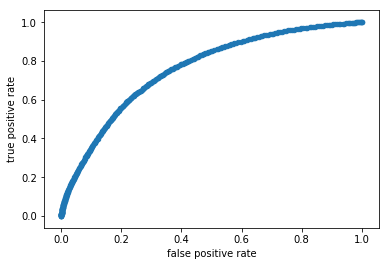

In [179]:
# выводим ROC-кривую для контрольной выборки
tmp = glm_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 'true positive rate': tmp[1]})
df.plot(kind='scatter', x='false positive rate', y='true positive rate')

In [180]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-0.820,-0.820
1,living_region.ADYGEJA,0.498,0.498
2,living_region.ALTAJ,0.452,0.452
3,living_region.ALTAJSKIJ,0.042,0.042
4,living_region.AMURSKAJA,-0.120,-0.120
5,living_region.ARHANGEL'SKAJA,-0.087,-0.087
6,living_region.ASTRAHANSKAJA,-0.311,-0.311
7,living_region.BASHKORTOSTAN,-0.070,-0.070
8,living_region.BELGORODSKAJA,0.051,0.051
9,living_region.BRJANSKAJA,0.030,0.030


In [181]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задавая lambda_search и список переменных для взаимодействий
glm_model2 = H2OGeneralizedLinearEstimator(model_id='logreg_credit2', family='binomial', 
                                           lambda_search=True,
                                           interactions=['monthcat',
                                                         'credsumcat',
                                                         'paymcat'])
# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                 validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [182]:
# смотрим модель с взаимодействиями
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit2


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12723244024512417
RMSE: 0.35669656606859024
LogLoss: 0.40661472251440295
Null degrees of freedom: 119521
Residual degrees of freedom: 119440
Null deviance: 111230.51420719465
Residual deviance: 97198.80972873294
AIC: 97362.80972873294
AUC: 0.7502734337208057
pr_auc: 0.3918407884244943
Gini: 0.5005468674416114
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20516077765354543: 


,0,1,Error,Rate
0,73069.0,25414.0,0.2581,(25414.0/98483.0)
1,7849.0,13190.0,0.3731,(7849.0/21039.0)
Total,80918.0,38604.0,0.2783,(33263.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2051608,0.4422983,232.0
max f2,0.1252872,0.5890511,298.0
max f0point5,0.3011588,0.4000273,162.0
max accuracy,0.5008884,0.8288600,67.0
max precision,0.8810330,1.0,0.0
max recall,0.0236763,1.0,398.0
max specificity,0.8810330,1.0,0.0
max absolute_mcc,0.2051608,0.3004244,232.0
max min_per_class_accuracy,0.1820523,0.6897666,250.0
max mean_per_class_accuracy,0.1705838,0.6909848,259.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.5797340,3.8379820,3.8379820,0.6755853,0.6570195,0.6755853,0.6570195,0.0384049,0.0384049,283.7982050,283.7982050
,2,0.0200047,0.5149738,3.1661325,3.5021978,0.5573222,0.5446640,0.6164785,0.6008652,0.0316555,0.0700604,216.6132472,250.2197757
,3,0.0300028,0.4724628,2.8571255,3.2872336,0.5029289,0.4920508,0.5786392,0.5646039,0.0285660,0.0986264,185.7125549,228.7233650
,4,0.0400010,0.4416238,2.6479516,3.1274466,0.4661088,0.4561538,0.5505124,0.5374970,0.0264746,0.1251010,164.7951632,212.7446574
,5,0.0500075,0.4178759,2.4224887,2.9863842,0.4264214,0.4290819,0.5256818,0.5158031,0.0242407,0.1493417,142.2488670,198.6384226
,6,0.1000067,0.3465443,2.1370195,2.5617374,0.3761714,0.3780744,0.4509328,0.4469445,0.1068492,0.2561909,113.7019456,156.1737370
,7,0.1500059,0.3039063,1.9240780,2.3491961,0.3386881,0.3241182,0.4135200,0.4060047,0.0962023,0.3523932,92.4078016,134.9196108
,8,0.2000050,0.2702768,1.7643719,2.2029962,0.3105756,0.2866470,0.3877850,0.3761665,0.0882171,0.4406103,76.4371936,120.2996181
,9,0.3000033,0.2150756,1.5633134,1.9897745,0.2751841,0.2415485,0.3502524,0.3312951,0.1563287,0.5969390,56.3313388,98.9774530
,10,0.4000017,0.1721016,1.1749804,1.7860803,0.2068273,0.1928463,0.3143969,0.2966836,0.1174961,0.7144351,17.4980448,78.6080270




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.127076684253279
RMSE: 0.3564781679896807
LogLoss: 0.40623771139183346
Null degrees of freedom: 51223
Residual degrees of freedom: 51142
Null deviance: 47671.21301599573
Residual deviance: 41618.24105667054
AIC: 41782.24105667054
AUC: 0.7516606742028222
pr_auc: 0.39199271973416766
Gini: 0.5033213484056445
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21573514210382105: 


,0,1,Error,Rate
0,32351.0,9856.0,0.2335,(9856.0/42207.0)
1,3578.0,5439.0,0.3968,(3578.0/9017.0)
Total,35929.0,15295.0,0.2623,(13434.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2157351,0.4474334,221.0
max f2,0.1342279,0.5866527,289.0
max f0point5,0.2928595,0.4101847,162.0
max accuracy,0.5285983,0.8282836,54.0
max precision,0.8527452,1.0,0.0
max recall,0.0252054,1.0,397.0
max specificity,0.8527452,1.0,0.0
max absolute_mcc,0.2157351,0.3076450,221.0
max min_per_class_accuracy,0.1826246,0.6920262,248.0
max mean_per_class_accuracy,0.1707852,0.6943136,258.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.5798254,3.7429218,3.7429218,0.6588694,0.6544106,0.6588694,0.6544106,0.0374848,0.0374848,274.2921806,274.2921806
,2,0.0200102,0.5165828,3.0734151,3.4084951,0.5410156,0.5464241,0.6,0.6004700,0.0307198,0.0682045,207.3415146,240.8495065
,3,0.0300055,0.4707638,2.7294589,3.1822970,0.4804688,0.4928894,0.5601822,0.5646332,0.0272818,0.0954863,172.9458939,218.2296954
,4,0.0400008,0.4424498,2.4520749,2.9998305,0.4316406,0.4556594,0.5280625,0.5374030,0.0245093,0.1199956,145.2074900,199.9830535
,5,0.0500156,0.4172676,2.2590416,2.8514993,0.3976608,0.4293237,0.5019516,0.5157618,0.0226239,0.1426195,125.9041563,185.1499254
,6,0.1000117,0.3481806,2.2936248,2.5726165,0.4037485,0.3783950,0.4528597,0.4470918,0.1146723,0.2572918,129.3624819,157.2616485
,7,0.1500078,0.3047148,2.0385311,2.3946112,0.3588442,0.3253529,0.4215252,0.4065175,0.1019186,0.3592104,103.8531150,139.4611208
,8,0.2000039,0.2698449,1.8588565,2.2606856,0.3272159,0.2869477,0.3979502,0.3766279,0.0929356,0.4521459,85.8856478,126.0685599
,9,0.2999961,0.2144907,1.5316711,2.0176966,0.2696212,0.2408273,0.3551767,0.3313640,0.1531552,0.6053011,53.1671120,101.7696586
,10,0.4000078,0.1715369,1.1388263,1.7979576,0.2004685,0.1923034,0.3164959,0.2965955,0.1138960,0.7191971,13.8826349,79.7957581



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2019-05-15 13:02:50,0.000 sec,1,",62E-1",1,0.9306280,0.9306421
,2019-05-15 13:02:50,0.089 sec,2,",57E-1",3,0.9296611,0.9296473
,2019-05-15 13:02:50,0.139 sec,3,",52E-1",3,0.9287810,0.9287376
,2019-05-15 13:02:50,0.180 sec,4,",47E-1",3,0.9280344,0.9279633
,2019-05-15 13:02:50,0.268 sec,5,",43E-1",3,0.9273997,0.9273026
---,---,---,---,---,---,---,---
,2019-05-15 13:02:56,5.860 sec,71,",94E-3",86,0.8124991,0.8166653
,2019-05-15 13:02:56,6.003 sec,72,",86E-3",89,0.8117877,0.8170544
,2019-05-15 13:02:56,6.149 sec,73,",78E-3",92,0.8110686,0.8176820
,2019-05-15 13:02:56,6.292 sec,74,",71E-3",95,0.8103900,0.8186037



See the whole table with table.as_data_frame()


In [183]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать compute_p_values=True, отключить 
# регуляризацию (lambda_=0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(model_id='logreg_credit3', lambda_=0, 
                                           family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame=tr, 
                 validation_frame=tst)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [184]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-1.626,0.530,-3.068,0.002,-1.626
1,living_region.ALTAJ,0.147,0.404,0.364,0.716,0.147
2,living_region.ALTAJSKIJ,-0.465,0.183,-2.537,0.011,-0.465
3,living_region.AMURSKAJA,-0.680,0.169,-4.031,0.000,-0.680
4,living_region.ARHANGEL'SKAJA,-0.616,0.150,-4.096,0.000,-0.616
5,living_region.ASTRAHANSKAJA,-0.838,0.148,-5.657,0.000,-0.838
6,living_region.BASHKORTOSTAN,-0.597,0.134,-4.457,0.000,-0.597
7,living_region.BELGORODSKAJA,-0.456,0.175,-2.610,0.009,-0.456
8,living_region.BRJANSKAJA,-0.483,0.169,-2.862,0.004,-0.483
9,living_region.BURJATIJA,-0.227,0.151,-1.508,0.132,-0.227


In [185]:
# импортируем класс TargetEncoder библиотеки H2O
from h2o.targetencoder import TargetEncoder

# создаем столбец с индексами блоков
tr['cv_fold_te'] = tr.kfold_column(n_folds=5, seed=42)

# создаем экземпляр класса TargetEncoder (модель)
targetEncoder = TargetEncoder(x=['living_region'], 
                              blending_avg=True, 
                              inflection_point=3, 
                              smoothing=1,
                              y='open_account_flg', 
                              fold_column='cv_fold_te')

# обучаем модель, т.е. создаем таблицу, в соответствии с которой 
# категориям предиктора living_region будут сопоставлены средние 
# значения зависимой переменной
targetEncoder.fit(tr)

In [186]:
# применяем модель к обучающей выборке, категории предиктора 
# в обучающей выборке заменяются на сглаженные средние значения зависимой 
# переменной
tr = targetEncoder.transform(frame=tr, 
                             holdout_type='kfold',
                             noise=0
                            )

# создаем экземпляр класса TargetEncoder (модель)
# для контрольной выборки
targetEncoder_test = TargetEncoder(x=['living_region'], 
                                   y='open_account_flg', 
                                   blending_avg=False)

# обучаем модель, т.е. создаем таблицу, в соответствии с которой 
# категориям предиктора в контрольной выборке будут сопоставлены 
# обычные средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
targetEncoder_test.fit(tr)

# применяем модель к контрольной выборке,
# категории предиктора в контрольной выборке заменяются на обычные 
# средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
tst = targetEncoder_test.transform(frame=tst, 
                                   holdout_type='none',
                                   noise=0
                                  )

In [187]:
# взглянем на результаты кодирования
print(tr[['cv_fold_te', 'living_region', 'living_region_te']])
print(tst[['living_region', 'living_region_te']])

cv_fold_te,living_region,living_region_te
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125
0,ADYGEJA,0.253125


living_region,living_region_te
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143
ADYGEJA,0.257143


In [188]:
# заново формируем список предикторов
independents = list(set(tr.col_names) - set(['cv_fold_te', 'open_account_flg', 'living_region']))
independents

['score_sq',
 'ind + gender',
 'ind + agecat',
 'credsumcat',
 'marital_status',
 'gender + status',
 'monthcat',
 'ind',
 'score_shk',
 'gender + scorecat',
 'status',
 'credit_sum',
 'age',
 'match',
 'pticat',
 'monthly_income',
 'credit_count',
 'paym',
 'job_position',
 'ind + scorecat',
 'credit_month',
 'tariff_id',
 'paymcat',
 'credit_sum_sq',
 'overdue_credit_count',
 'gender',
 'dir_status',
 'match + status',
 'ind + paymcat',
 'living_region_te',
 'agecat',
 'scorecat',
 'pti',
 'education',
 'marital_status + gender']

In [189]:
# обучаем модель на наборе, в котором к переменной living_region
# применено кодирование средними значениями зависимой переменной
glm_model4 = H2OGeneralizedLinearEstimator(model_id='logreg_credit4', family='binomial', 
                                           lambda_search=True)
glm_model4.train(independents, dependent, 
                 training_frame=tr, 
                 validation_frame=tst)
glm_model4

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12618000004950022
RMSE: 0.3552182428444522
LogLoss: 0.4024212932475715
Null degrees of freedom: 119521
Residual degrees of freedom: 119380
Null deviance: 111230.51420718951
Residual deviance: 96196.39562307247
AIC: 96480.39562307247
AUC: 0.75738588929929
pr_auc: 0.4009231423086239
Gini: 0.5147717785985799
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20316454528499212: 


,0,1,Error,Rate
0,73420.0,25063.0,0.2545,(25063.0/98483.0)
1,7714.0,13325.0,0.3667,(7714.0/21039.0)
Total,81134.0,38388.0,0.2742,(32777.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2031645,0.4484494,237.0
max f2,0.1109990,0.5928752,307.0
max f0point5,0.3242299,0.4087418,164.0
max accuracy,0.5218553,0.8297552,76.0
max precision,0.9057122,0.8888889,1.0
max recall,0.0116680,1.0,399.0
max specificity,0.9220790,0.9999898,0.0
max absolute_mcc,0.1946300,0.3093552,243.0
max min_per_class_accuracy,0.1763590,0.6937543,256.0
max mean_per_class_accuracy,0.1589411,0.6953196,268.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6560635,3.9709814,3.9709814,0.6989967,0.7369752,0.6989967,0.7369752,0.0397357,0.0397357,297.0981428,297.0981428
,2,0.0200047,0.5776377,3.1471167,3.5592213,0.5539749,0.6128665,0.6265161,0.6749468,0.0314654,0.0712011,214.7116662,255.9221329
,3,0.0300028,0.5258222,3.0235139,3.3807020,0.5322176,0.5502180,0.5950920,0.6333821,0.0302296,0.1014307,202.3513893,238.0701980
,4,0.0400010,0.4866860,2.7002451,3.2106233,0.4753138,0.5052352,0.5651537,0.6013521,0.0269975,0.1284282,170.0245112,221.0623344
,5,0.0500075,0.4578083,2.4937383,3.0671744,0.4389632,0.4710973,0.5399030,0.5752881,0.0249537,0.1533818,149.3738337,206.7174378
,6,0.1000067,0.3690239,2.1636371,2.6154436,0.3808568,0.4076420,0.4603865,0.4914721,0.1081800,0.2615619,116.3637136,161.5443553
,7,0.1500059,0.3186046,1.9725602,2.4011611,0.3472222,0.3424762,0.4226672,0.4418095,0.0986264,0.3601882,97.2560219,140.1161061
,8,0.2000050,0.2795482,1.7434580,2.2367422,0.3068942,0.2983365,0.3937252,0.4059428,0.0871714,0.4473597,74.3458044,123.6742185
,9,0.3000033,0.2140280,1.5799494,2.0178174,0.2781124,0.2457688,0.3551887,0.3525529,0.1579923,0.6053520,57.9949438,101.7817375
,10,0.4000017,0.1642388,1.1512147,1.8011712,0.2026439,0.1879918,0.3170533,0.3114135,0.1151195,0.7204715,15.1214663,80.1171228




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12615961489143562
RMSE: 0.355189547835287
LogLoss: 0.40250073959058263
Null degrees of freedom: 51223
Residual degrees of freedom: 51082
Null deviance: 47671.21301599263
Residual deviance: 41235.39576957601
AIC: 41519.39576957601
AUC: 0.7576775625764491
pr_auc: 0.40095186490839196
Gini: 0.5153551251528983
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21861997212146758: 


,0,1,Error,Rate
0,32623.0,9584.0,0.2271,(9584.0/42207.0)
1,3601.0,5416.0,0.3994,(3601.0/9017.0)
Total,36224.0,15000.0,0.2574,(13185.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2186200,0.4510139,228.0
max f2,0.1268630,0.5918980,296.0
max f0point5,0.2959508,0.4126495,179.0
max accuracy,0.5227054,0.8292012,77.0
max precision,0.9309651,1.0,0.0
max recall,0.0158695,1.0,398.0
max specificity,0.9309651,1.0,0.0
max absolute_mcc,0.2186200,0.3126465,228.0
max min_per_class_accuracy,0.1763566,0.6926916,256.0
max mean_per_class_accuracy,0.1630793,0.6956784,266.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.6600270,3.9201015,3.9201015,0.6900585,0.7405951,0.6900585,0.7405951,0.0392592,0.0392592,292.0101537,292.0101537
,2,0.0200102,0.5768678,3.0956059,3.5082559,0.5449219,0.6151360,0.6175610,0.6779268,0.0309416,0.0702007,209.5605869,250.8255896
,3,0.0300055,0.5244835,2.9291754,3.3153547,0.515625,0.5484875,0.5836044,0.6348084,0.0292780,0.0994788,192.9175446,231.5354666
,4,0.0400008,0.4855601,2.7183636,3.1661797,0.4785156,0.5044554,0.5573450,0.6022360,0.0271709,0.1266497,171.8363577,216.6179733
,5,0.0500156,0.4566210,2.2479678,2.9823223,0.3957115,0.4711146,0.5249805,0.5759810,0.0225130,0.1491627,124.7967830,198.2322315
,6,0.1000117,0.3696845,2.2359515,2.6092097,0.3935963,0.4083771,0.4593012,0.4921954,0.1117888,0.2609515,123.5951468,160.9209736
,7,0.1500078,0.3192167,1.9808578,2.3997863,0.3486919,0.3428189,0.4224362,0.4424097,0.0990352,0.3599867,98.0857798,139.9786348
,8,0.2000039,0.2791494,1.9165298,2.2789840,0.3373682,0.2985948,0.4011713,0.4064595,0.0958190,0.4558057,91.6529830,127.8984011
,9,0.2999961,0.2131992,1.5327802,2.0302656,0.2698165,0.2450419,0.3573892,0.3526572,0.1532661,0.6090718,53.2780222,103.0265601
,10,0.4000078,0.1641858,1.1321730,1.8057205,0.1992973,0.1876049,0.3178624,0.3113901,0.1132306,0.7223023,13.2173031,80.5720543



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2019-05-15 13:03:02,0.000 sec,1,",69E-1",1,0.9306280,0.9306421
,2019-05-15 13:03:02,0.033 sec,2,",63E-1",2,0.9294839,0.9295724
,2019-05-15 13:03:02,0.063 sec,3,",57E-1",4,0.9275834,0.9277131
,2019-05-15 13:03:02,0.211 sec,4,",52E-1",4,0.9258220,0.9259825
,2019-05-15 13:03:02,0.321 sec,5,",47E-1",4,0.9243149,0.9245018
---,---,---,---,---,---,---,---
,2019-05-15 13:03:08,5.774 sec,103,",48E-4",129,0.8051033,0.8052121
,2019-05-15 13:03:08,5.862 sec,104,",44E-4",133,0.8050299,0.8051533
,2019-05-15 13:03:08,5.962 sec,105,",4E-4",135,0.8049714,0.8051036
,2019-05-15 13:03:08,6.057 sec,106,",37E-4",140,0.8049082,0.8050517



See the whole table with table.as_data_frame()


In [190]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', 
                                                         lambda_search=True),
                           grid_id='gridsearch_out', hyper_params=hyper_parameters)

# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [191]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha                model_ids              logloss
0     [0.0]   gridsearch_out_model_1  0.40276414711710307
1     [1.0]  gridsearch_out_model_11  0.40280090132852797
2     [0.9]  gridsearch_out_model_10  0.40280919703791945
3     [0.8]   gridsearch_out_model_9  0.40282570309937105
4     [0.6]   gridsearch_out_model_7   0.4028496762918641
5     [0.7]   gridsearch_out_model_8  0.40285598965632474
6     [0.5]   gridsearch_out_model_6  0.40286009903336006
7     [0.4]   gridsearch_out_model_5   0.4028899966107194
8     [0.3]   gridsearch_out_model_4   0.4029022562183573
9     [0.2]   gridsearch_out_model_3  0.40291749387884496
10    [0.1]   gridsearch_out_model_2  0.40300215110368787


In [192]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)
gridperf

      alpha                model_ids                 auc
0     [0.0]   gridsearch_out_model_1  0.7572077062008471
1     [1.0]  gridsearch_out_model_11  0.7570564989402472
2     [0.9]  gridsearch_out_model_10  0.7570233123879335
3     [0.8]   gridsearch_out_model_9  0.7569853639741495
4     [0.5]   gridsearch_out_model_6  0.7569711073474942
5     [0.6]   gridsearch_out_model_7   0.756958640551403
6     [0.7]   gridsearch_out_model_8  0.7569448233586776
7     [0.4]   gridsearch_out_model_5  0.7569099386753566
8     [0.3]   gridsearch_out_model_4  0.7568953845077702
9     [0.2]   gridsearch_out_model_3  0.7568907261702738
10    [0.1]   gridsearch_out_model_2   0.756736070282386


In [193]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gridsearch_out_model_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12572784232200748
RMSE: 0.354581221050985
LogLoss: 0.4007099345851739
Null degrees of freedom: 119521
Residual degrees of freedom: 119241
Null deviance: 111230.51420718951
Residual deviance: 95787.3056029783
AIC: 96349.3056029783
AUC: 0.7607597044686792
pr_auc: 0.4047800046641588
Gini: 0.5215194089373585
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20370230328479103: 


,0,1,Error,Rate
0,73585.0,24898.0,0.2528,(24898.0/98483.0)
1,7697.0,13342.0,0.3658,(7697.0/21039.0)
Total,81282.0,38240.0,0.2727,(32595.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2037023,0.4501425,234.0
max f2,0.1100988,0.5954307,308.0
max f0point5,0.3266071,0.4121205,160.0
max accuracy,0.5213181,0.8300564,78.0
max precision,0.9373542,1.0,0.0
max recall,0.0050061,1.0,399.0
max specificity,0.9373542,1.0,0.0
max absolute_mcc,0.2037023,0.3113507,234.0
max min_per_class_accuracy,0.1763661,0.6956632,253.0
max mean_per_class_accuracy,0.1677372,0.6981364,260.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6659481,3.9472315,3.9472315,0.6948161,0.7498226,0.6948161,0.7498226,0.0394981,0.0394981,294.7231539,294.7231539
,2,0.0200047,0.5850987,3.2754734,3.6114929,0.5765690,0.6215674,0.6357173,0.6857219,0.0327487,0.0722468,227.5473384,261.1492938
,3,0.0300028,0.5326909,3.0044981,3.4092177,0.5288703,0.5577349,0.6001115,0.6430715,0.0300395,0.1022862,200.4498082,240.9217742
,4,0.0400010,0.4949086,2.6527056,3.2201293,0.4669456,0.5132140,0.5668270,0.6106139,0.0265222,0.1288084,165.2705585,222.0129261
,5,0.0500075,0.4634977,2.4747384,3.0709763,0.4356187,0.4787577,0.5405722,0.5842294,0.0247635,0.1535719,147.4738426,207.0976268
,6,0.1000067,0.3728779,2.1978599,2.6344546,0.3868809,0.4120428,0.4637330,0.4981433,0.1098912,0.2634631,119.7859868,163.4454591
,7,0.1500059,0.3205913,1.9849184,2.4179546,0.3493976,0.3449802,0.4256233,0.4470918,0.0992443,0.3627074,98.4918427,141.7954612
,8,0.2000050,0.2799202,1.7862365,2.2600317,0.3144244,0.2992953,0.3978247,0.4101442,0.0893103,0.4520177,78.6236458,126.0031680
,9,0.3000033,0.2141520,1.5538071,2.0246300,0.2735107,0.2459352,0.3563879,0.3554094,0.1553781,0.6073958,55.3807074,102.4630043
,10,0.4000017,0.1636414,1.1859127,1.8149551,0.2087517,0.1875867,0.3194796,0.3134546,0.1185893,0.7259851,18.5912710,81.4955096




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.12640452419564308
RMSE: 0.35553413928291483
LogLoss: 0.40276414711710307
Null degrees of freedom: 119521
Residual degrees of freedom: 119241
Null deviance: 111231.15360905201
Residual deviance: 96278.35278346078
AIC: 96840.35278346078
AUC: 0.7572077062008471
pr_auc: 0.3987185222757383
Gini: 0.5144154124016942
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19969797399588643: 


,0,1,Error,Rate
0,72862.0,25621.0,0.2602,(25621.0/98483.0)
1,7615.0,13424.0,0.3619,(7615.0/21039.0)
Total,80477.0,39045.0,0.2781,(33236.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1996980,0.4468411,239.0
max f2,0.1070552,0.5926764,309.0
max f0point5,0.3222885,0.4067534,165.0
max accuracy,0.5286213,0.8293452,77.0
max precision,0.9378377,1.0,0.0
max recall,0.0051833,1.0,399.0
max specificity,0.9378377,1.0,0.0
max absolute_mcc,0.1980508,0.3068929,240.0
max min_per_class_accuracy,0.1762728,0.6930462,255.0
max mean_per_class_accuracy,0.1702808,0.6955179,259.0


Gains/Lift Table: Avg response rate: 17,60 %, avg score: 17,60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6662327,3.9044817,3.9044817,0.6872910,0.7506819,0.6872910,0.7506819,0.0390703,0.0390703,290.4481739,290.4481739
,2,0.0200047,0.5867357,3.1518706,3.5283336,0.5548117,0.6227723,0.6210790,0.6867539,0.0315129,0.0705832,215.1870614,252.8333561
,3,0.0300028,0.5338826,2.9664665,3.3410968,0.5221757,0.5587218,0.5881205,0.6440884,0.0296592,0.1002424,196.6466461,234.1096755
,4,0.0400010,0.4958832,2.6431977,3.1666585,0.4652720,0.5142776,0.5574148,0.6116425,0.0264271,0.1266695,164.3197680,216.6658480
,5,0.0500075,0.4638498,2.5032383,3.0339078,0.4406355,0.4794884,0.5340472,0.5851984,0.0250487,0.1517182,150.3238292,203.3907845
,6,0.1000067,0.3731052,2.1503283,2.5921550,0.3785141,0.4125090,0.4562871,0.4988609,0.1075146,0.2592329,115.0328296,159.2155031
,7,0.1500059,0.3206499,1.9915728,2.3919721,0.3505689,0.3453510,0.4210497,0.4476938,0.0995770,0.3588098,99.1572847,139.1972136
,8,0.2000050,0.2798948,1.7985947,2.2436340,0.3165997,0.2993054,0.3949383,0.4105983,0.0899282,0.4487381,79.8594667,124.3633974
,9,0.3000033,0.2138524,1.5428748,2.0100541,0.2715863,0.2457227,0.3538221,0.3556413,0.1542849,0.6030230,54.2874812,101.0054101
,10,0.4000017,0.1632980,1.1835361,1.8034289,0.2083333,0.1874175,0.3174507,0.3135862,0.1183516,0.7213746,18.3536131,80.3428931



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7215227,0.0034081,0.7265065,0.7245018,0.7191039,0.7242833,0.7132182
auc,0.7572744,0.0025534,0.7575148,0.7509865,0.7563934,0.7613805,0.7600967
err,0.2784773,0.0034081,0.2734935,0.2754982,0.2808960,0.2757167,0.2867818
err_count,6657.2,98.011635,6522.0,6553.0,6696.0,6607.0,6908.0
f0point5,0.3789038,0.0020512,0.3823631,0.3755574,0.3820791,0.3785673,0.3759519
---,---,---,---,---,---,---,---
r2,0.1285328,0.0025671,0.1263940,0.1227348,0.1297008,0.1332283,0.1306061
recall,0.6404447,0.0122755,0.6361031,0.6175413,0.6486359,0.6310657,0.6688773
residual_deviance,19254.064,49.71265,19208.275,19266.35,19348.922,19147.275,19299.498
rmse,0.3555232,0.0007868,0.3556379,0.356238,0.3571363,0.3540992,0.3545046



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2019-05-15 13:03:34,0.000 sec,2,",31E1",281,0.9263063,nan,0.9271382,0.0018254
,2019-05-15 13:03:34,0.162 sec,4,",19E1",281,0.9240201,nan,0.9252384,0.0018285
,2019-05-15 13:03:34,0.322 sec,6,",12E1",281,0.9207515,nan,0.9224714,0.0018324
,2019-05-15 13:03:35,0.501 sec,8,",74E0",281,0.9162832,nan,0.9186098,0.0018367
,2019-05-15 13:03:35,0.729 sec,10,",46E0",281,0.9104735,nan,0.9134652,0.0018394
---,---,---,---,---,---,---,---,---,---
,2019-05-15 13:03:40,5.563 sec,50,",21E-4",281,0.8018126,nan,0.8057668,0.0023997
,2019-05-15 13:03:40,5.716 sec,51,",13E-4",281,0.8016437,nan,0.8056681,0.0024126
,2019-05-15 13:03:40,5.866 sec,52,",81E-5",281,0.8015258,nan,0.8056044,0.0024226
,2019-05-15 13:03:40,5.994 sec,53,",5E-5",281,0.8014199,nan,0.8055459,0.0024330



See the whole table with table.as_data_frame()


In [194]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(tst)
print(bestmodel_perf.auc())

0.7587112623597005


In [195]:
# смотрим оптимальные значения lambda_ и alpha
best_model.summary()['regularization']

['Ridge ( lambda = 5.004E-6 )']

In [196]:
# завершаем работу с H2O
h2o.cluster().shutdown()

H2O session _sid_b48a closed.


#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta